In [327]:
# code from laptop
from cmath import nan
from traceback import format_exception_only
#from eagerpy import zeros_like
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.tree import plot_tree
import mtools as mot
from scipy.stats import ranksums
from os.path import exists
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
import matplotlib.cm as cm
import random
import pickle
import scipy.io as spio
import pandas as pd
import matplotlib.animation as animation
from scipy.signal import find_peaks
import scipy.stats as stats
import configparser
from rastermap import Rastermap

import scipy.signal


In [328]:
config = configparser.ConfigParser()

# Read the configuration file
config.read('config.ini')

# Get the data folder path from the config file
savefolder= config['paths']['savefolder']
datafolder= config['paths']['datafolder']
skeletonsfolder= config['paths']['skeletonsfolder']

In [329]:
from pathlib import Path
import configparser
import os  # Import os for cross-platform compatibility

# Detect base directory
try:
    BASE_DIR = Path(__file__).resolve().parent  # For scripts
except NameError:
    BASE_DIR = Path.cwd()  # For Jupyter Notebooks

# Move one level up
BASE_DIR = BASE_DIR.parent

# Load config.ini
config = configparser.ConfigParser()
config.read(os.path.join(os.getcwd(), "config.ini"))

# Construct full paths using pathlib and ensure they end with a separator
skeletonsfolder = str((BASE_DIR / config["paths"]["skeletonsfolder"]).resolve()) + os.sep
savefolder = str((BASE_DIR / config["paths"]["savefolder"]).resolve()) + os.sep
datafolder = str((BASE_DIR / config["paths"]["datafolder"]).resolve()) + os.sep

# Print paths to verify
print("Base Directory:", BASE_DIR)
print("Skeletons Folder:", skeletonsfolder)
print("Save Folder:", savefolder)
print("Data Folder:", datafolder)


Base Directory: c:\Users\hamed\Desktop\Hamed\Github\TP7
Skeletons Folder: C:\Users\hamed\Desktop\Hamed\Github\TP7\data\GCaMP6f_478-485\skeleton\
Save Folder: C:\Users\hamed\Desktop\Hamed\Github\TP7\results_new\
Data Folder: C:\Users\hamed\Desktop\Hamed\Github\TP7\data\GCaMP6f_478-485\


In [330]:
fol1='485'#fol#'478'
phases=['learning','learned']
direction=['L','R']
PC_phase_data={}
PCclstr_phase_data={}

#sessinfo_and_mask=np.load(savefolder+fol1+'Sesseion_info_All',allow_pickle=True)
# Construct the correct file path
file_path = os.path.join(savefolder, fol1 + "Sesseion_info_All")

# Load the file
sessinfo_and_mask = np.load(file_path, allow_pickle=True)
sess_info=sessinfo_and_mask['sess_info']
seqs=sess_info['seqs']
Masks=sessinfo_and_mask['Masks']

## initializtion


In [331]:
model = Rastermap(n_components=1, n_X=60).fit(sess_info['extract'])# compute raster map based on the data of task x

# compute correlation between speed and each cells activity

isort = np.argsort(model.embedding[:,0])


Sfilt=sess_info['extract'][isort, :]
Sfilt = stats.zscore(Sfilt, axis=1)
sorted_seqs=[]
for seq in seqs:
    sorted_seqs.append(np.ravel([np.where(isort==x)[0] for x in seq]))# sorting seqs according to rastermap

nmin 109
0.048323869705200195
2.287506341934204
2.444944381713867
2.4459452629089355
(58, 60)
(90,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0277      2
0.01s    10        0.1155      4
0.02s    20        0.1954      8
0.03s    30        0.3259      18
0.04s    40        0.4233      28
0.05s    50        0.5027      38
0.07s    60        0.5764      48
0.08s    70        0.6451      58
0.09s    80        0.6457      58
0.10s   final      0.6457
0.10s upsampled    0.6457


In [332]:
colorlist=["#FFD700",
"#00FFFF",
"#7346d0",
"#72d658",
"#d65171",
"#c09294",
"#6678c6",
"#cdd24b",
"#FFA500",#
"#4a7875",
"#ae3e83",
"#7b332e",
"#c98ccc",
"#d74f34",
"#45314e",
"#cf4dcc",
"#5f893e",
"#cac795",
"#c48840",
"#4f2a7e"]

#colorlist[np.max(sess_info['ids_clust'])]='#E5E5E5'# make bad cluster gray
colorlist[-1]='#E5E5E5'# make bad cluster gray

In [333]:
# def get_n_colors(n):
#     """
#     Return a list of n hex color codes.
    
#     If n is less than or equal to the number of predefined colors, return the first n
#     colors from the predefined list. Otherwise, generate n colors using a matplotlib colormap.
    
#     Parameters
#     ----------
#     n : int
#         The number of colors to produce.
        
#     Returns
#     -------
#     List[str]
#         A list of n hex color codes.
#     """
#     # Predefined list of 20 colors
#     predefined = [
#         "#FFD700", "#00FFFF", "#7346d0", "#72d658", "#d65171",
#         "#c09294", "#6678c6", "#cdd24b", "#FFA500", "#4a7875",
#         "#ae3e83", "#7b332e", "#c98ccc", "#d74f34", "#45314e",
#         "#cf4dcc", "#5f893e", "#cac795", "#c48840", "#4f2a7e"
#     ]
    
#     if n <= len(predefined):
#         return predefined[:n]
#     else:
#         # Import necessary modules for generating colors
#         import matplotlib.pyplot as plt
#         import matplotlib.colors as mcolors
        
#         # Generate n colors using the 'hsv' colormap for variety
#         cmap = plt.get_cmap('husl')
#         colors = [mcolors.to_hex(cmap(i / n)) for i in range(n)]
#         return colors

# # Example usage:
# if __name__ == "__main__":
#     n = np.max(sess_info['ids_clust'])+1  # Request 25 colors
#     colorlist = get_n_colors(n)
#     print(color_list)

# colorlist[-1]='#E5E5E5'# make bad cluster gray

In [334]:
import seaborn as sns
import matplotlib.colors as mcolors

def get_cluster_colors(n):
    """
    Generate n distinct hex color codes using Seaborn's husl palette.
    
    Parameters
    ----------
    n : int
        Number of distinct colors (clusters) to generate.
        
    Returns
    -------
    List[str]
        A list of n hex color codes.
    """
    palette = sns.color_palette("husl", n)
    # Use matplotlib.colors.to_hex to convert RGB tuple to hex string
    return [mcolors.to_hex(color) for color in palette]

# Example usage:
n_clusters = 27  # For example, 25 clusters
colorlist = get_cluster_colors(n_clusters)
print(colorlist)


['#f77189', '#f77463', '#ed7e32', '#d58c32', '#c39532', '#b49b32', '#a4a031', '#92a531', '#7aaa31', '#50b131', '#32b261', '#34b07f', '#34ae91', '#35ad9e', '#36acaa', '#37abb5', '#38a9c2', '#39a7d3', '#3ba3ec', '#749af4', '#9c8ff4', '#bb83f4', '#d872f4', '#f45cf0', '#f564d4', '#f669bc', '#f66da5']


In [335]:
# colorlist=["#FFD700",
# "#00FFFF",
# "#7346d0",
# "#72d658",
# "#d65171",
# "#cf4dcc",

# "#6678c6",
# "#ae3e83",
# "#FFA500",#
# "#4a7875",
# "#cdd24b",
# "#7b332e",
# "#c98ccc",
# "#d74f34",
# "#45314e",
# "#c09294",
# "#5f893e",
# "#cac795",
# "#c48840",
# "#4f2a7e"]

# colorlist[np.max(sess_info['ids_clust'])]='#E5E5E5'# make bad cluster gray

In [336]:
np.max(sess_info['ids_clust'])

19

[]

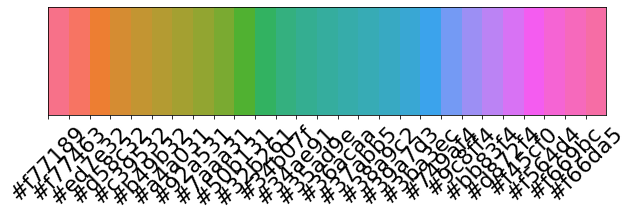

In [337]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Plot rectangles with the corresponding colors
for i, color in enumerate(colorlist):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set the axis limits and labels
ax.set_xlim(0, len(colorlist))
ax.set_ylim(0, 1)
ax.set_xticks(range(len(colorlist)))
ax.set_xticklabels(colorlist, rotation=45)
ax.set_yticks([])

In [373]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [384]:
def seq_raster_plot2(sess_info,cond_len,sorted_seqs,cond_names,binary_mask):
    figs=plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(figsize=(20,4))

    for ix,seq in enumerate(sorted_seqs):
        a=np.arange(len(seq))/len(sess_info['seqs'])+sess_info['id_peaks'][ix]
        ax.scatter(a,seq,marker='|',color = colorlist[sess_info['ids_clust'][ix]],s=2,rasterized=True)
    #plt.vlines(cond_len.values(),0,sess_info['extract'].shape[0],alpha=1,color='k')
    
    #plt.plot((poprate/np.max(poprate)*sp.shape[0]),alpha=.2)
    #plt.vlines(id_peaks,0,sp.shape[0],alpha=.5)
    #plt.xlim([100,16000])
    #plt.legend()
    all_x_values = []
    labels = []
    for label, x_values in cond_len.items():
        all_x_values.extend(x_values)
        labels.extend([label] * len(x_values))

    ax.set_xticks(all_x_values)
    ax.set_xticklabels(labels, rotation=0, fontsize=40)


    #binary_mask=np.asarray(Masks['conditions'])# if you wnat multiple color for differnt arenas (inwar/outward) uncoment this

    # for ix in np.unique(binary_mask):
    #     label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
    #     ax.fill_between(np.arange(len(binary_mask)), -1, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)



        #ax.axhline(x=np.where(binary_mask == ix)[0], color='black', linestyle='--', linewidth=2)
    plt.vlines(x=np.where(abs(np.diff(binary_mask))>0), ymin=-1,ymax=sess_info['extract'].shape[0],color='black', linestyle='-', linewidth=1)
    
    # Get the legend
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

    # if len(cond_names)>4:
    # # Hide the second-to-last legend item (line and text label)
    #     handles = legend.legendHandles
    #     labels = legend.texts
    #     handles[-2].set_visible(False)  # Hide the second-to-last legend item line
    #     labels[-2].set_visible(False)  # Hide the second-to-last legend item text label
    #     handles[-1].set_visible(False)  # Hide the second-to-last legend item line
    #     labels[-1].set_visible(False)  # Hide the second-to-last legend item text label

    #plt.legend()
        # Create legend elements for each unique cluster.
    unique_clusters = np.unique(sess_info['ids_clust'])
    legend_elements = []
    for cl in unique_clusters:
        # Treat -1 as a "Bad Cluster" (optional)
        if cl == -1:
            legend_elements.append(Patch(facecolor='gray', label="Bad Cluster"))
        else:
            legend_elements.append(Patch(facecolor=colorlist[int(cl)], label=f"Cluster {int(cl)}"))

    # Add the legend to the plot, positioned to the right of the axes.
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

In [343]:
plt.rcParams['svg.fonttype'] = 'none'  # Export text as SVG <text> objects, not paths

mpl.rcParams['xtick.major.size'] = 6    # Length of major ticks on x-axis
mpl.rcParams['xtick.major.width'] = 1.5 # Width of major ticks on x-axis
mpl.rcParams['xtick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['xtick.major.pad'] = 10    # Padding between ticks and x-axis labels

mpl.rcParams['ytick.major.size'] = 6    # Length of major ticks on y-axis
mpl.rcParams['ytick.major.width'] = 1.5 # Width of major ticks on y-axis
mpl.rcParams['ytick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['ytick.major.pad'] = 10    # Padding between ticks and y-axis labels


# Set default spine and tick settings globally for all plots
mpl.rcParams['axes.linewidth'] = 1.5     # Set the width of all spines (top, bottom, left, right)
mpl.rcParams['xtick.major.width'] = 1.5  # Width of major ticks on x-axis
mpl.rcParams['ytick.major.width'] = 1.5  # Width of major ticks on y-axis
mpl.rcParams['xtick.labelsize'] = 12     # Font size of x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 12     # Font size of y-axis tick labels

# Define the helper function to hide spines
def hide_spines(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [376]:
def seq_raster_plot(sess_info, cond_len, sorted_seqs, cond_names, binary_mask,colorlist):


    # Create the figure and axis for plotting
    fig, ax = plt.subplots(figsize=(20, 4))

    # Plot each sequence as a scatter plot
    for ix, seq in enumerate(sorted_seqs):
        # Create an x-axis array for this sequence, offset by the session's id_peak value
        a = np.arange(len(seq)) / len(sess_info['seqs']) + sess_info['id_peaks'][ix]
        # Plot with a vertical marker ('|') and marker size s=2
        ax.scatter(a, seq, marker='|', color=colorlist[sess_info['ids_clust'][ix]], s=2,rasterized=True)

    # Draw vertical lines for each condition boundary (if cond_len.values() returns arrays)
    plt.vlines(list(cond_len.values()), -2, sess_info['extract'].shape[0], alpha=1, color='k')

    # Compute midpoints for each condition by pairing _L and _R values.
    # We assume that cond_len is a dictionary with keys like 'sampling_L', 'sampling_R', etc.
    all_x_values = []
    all_labels = []
    # Define the base conditions (each with a left and right key)
    conditions = ['sampling', 'outward', 'reward', 'inward']
    for cond in conditions:
        left_key = cond + '_L'
        right_key = cond + '_R'
        if left_key in cond_len and right_key in cond_len:
            left_arr = np.array(cond_len[left_key])
            right_arr = np.array(cond_len[right_key])
            # Compute the midpoint for each session (assumes arrays are the same length)
            midpoints = (left_arr + right_arr) / 2
            all_x_values.extend(midpoints)
            all_labels.extend([cond] * len(midpoints))
        else:
            # Handle missing keys if necessary
            pass

    # Set the xticks using the computed midpoints, with the corresponding condition labels.
    ax.set_xticks(all_x_values)
    ax.set_xticklabels(all_labels, rotation=45, fontsize=18)

    # Draw vertical lines where the binary_mask changes
    change_indices = np.where(np.abs(np.diff(binary_mask)) > 0)[0]
    plt.vlines(x=change_indices, ymin=-1, ymax=sess_info['extract'].shape[0],
               color='black', linestyle='-', linewidth=1)

    # Create legend elements for each unique cluster.
    unique_clusters = np.unique(sess_info['ids_clust'])
    legend_elements = []
    for cl in unique_clusters:
        # Treat -1 as a "Bad Cluster" (optional)
        if cl == -1:
            legend_elements.append(Patch(facecolor='gray', label="Bad Cluster"))
        else:
            legend_elements.append(Patch(facecolor=colorlist[int(cl)], label=f"Cluster {int(cl)}"))

    # Add the legend to the plot, positioned to the right of the axes.
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x360 with 0 Axes>

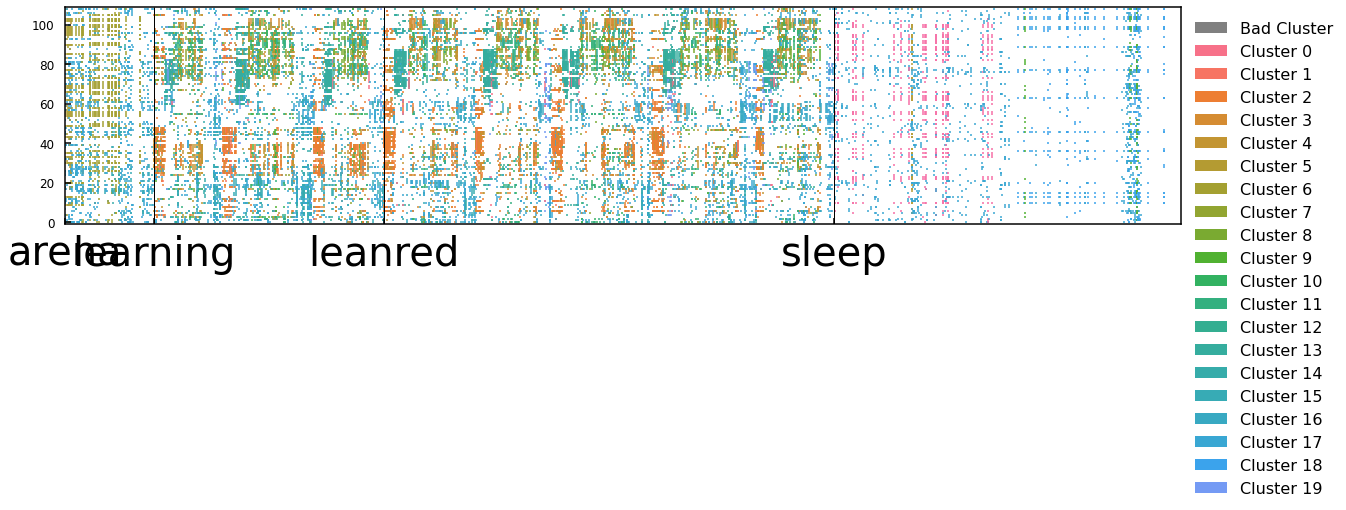

In [385]:
task_names={'arena':2,'learning':0,'leanred':1,'sleep':3}
task_len={}
l0=0
for tsk,valcond in task_names.items():
 
    #cond_len[con]=np.where(np.diff(np.where(np.asarray(Masks['conditions'])==valcond))>1)[1]
    #binvec=np.asarray(Masks['conditions'])
    binvec=np.asarray(Masks['phases'])

    task_len[tsk]= np.where((binvec == valcond) & (np.roll(binvec, 1) != valcond))[0]
    #cond_len=task_len
binary_mask=np.asarray(Masks['phases'])

seq_raster_plot2(sess_info,task_len,sorted_seqs,task_names,binary_mask)
plt.xlim([0,sess_info['extract'].shape[1]])
plt.ylim([-1,sess_info['extract'].shape[0]])

plt.savefig(savefolder+'Ratermap'+fol1+'.svg',dpi=400)

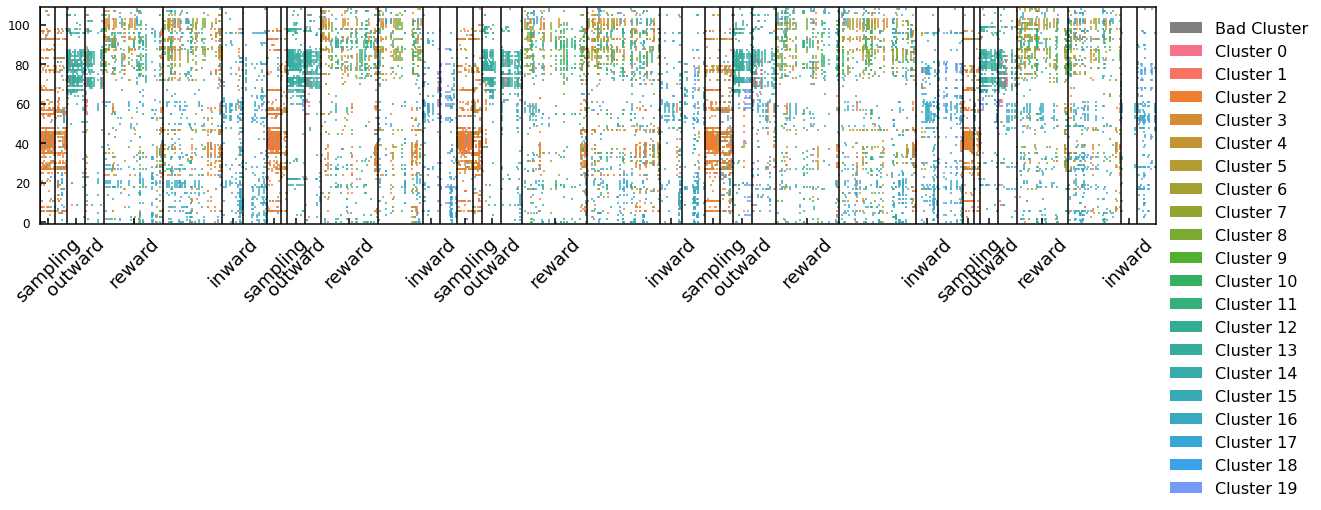

In [379]:
conds=['sampling_L',
 'sampling_R',
 'outward_L',
 'outward_R',
 'reward_L',
 'reward_R',
 'inward_L',
 'inward_R']


cond_number = dict(zip(conds, np.arange(len(conds))))# make mask values for each task
cond_names=cond_number
cond_len={}
l0=0
for con,valcond in cond_names.items():
 
    #cond_len[con]=np.where(np.diff(np.where(np.asarray(Masks['conditions'])==valcond))>1)[1]
    binvec=np.asarray(Masks['conditions'])

    cond_len[con]= np.where((binvec == valcond) & (np.roll(binvec, 1) != valcond))[0]

    
seq_raster_plot(sess_info,cond_len,sorted_seqs,cond_names,binary_mask,colorlist)
plt.xlim(task_len['leanred'][0],task_len['sleep'][0])
plt.ylim([-1,sess_info['extract'].shape[0]])

plt.savefig(savefolder+'Ratermap_learned_test'+fol1+'.svg',dpi=1000)

In [342]:
boz

NameError: name 'boz' is not defined

NameError: name 'STMx1' is not defined

<Figure size 720x360 with 0 Axes>

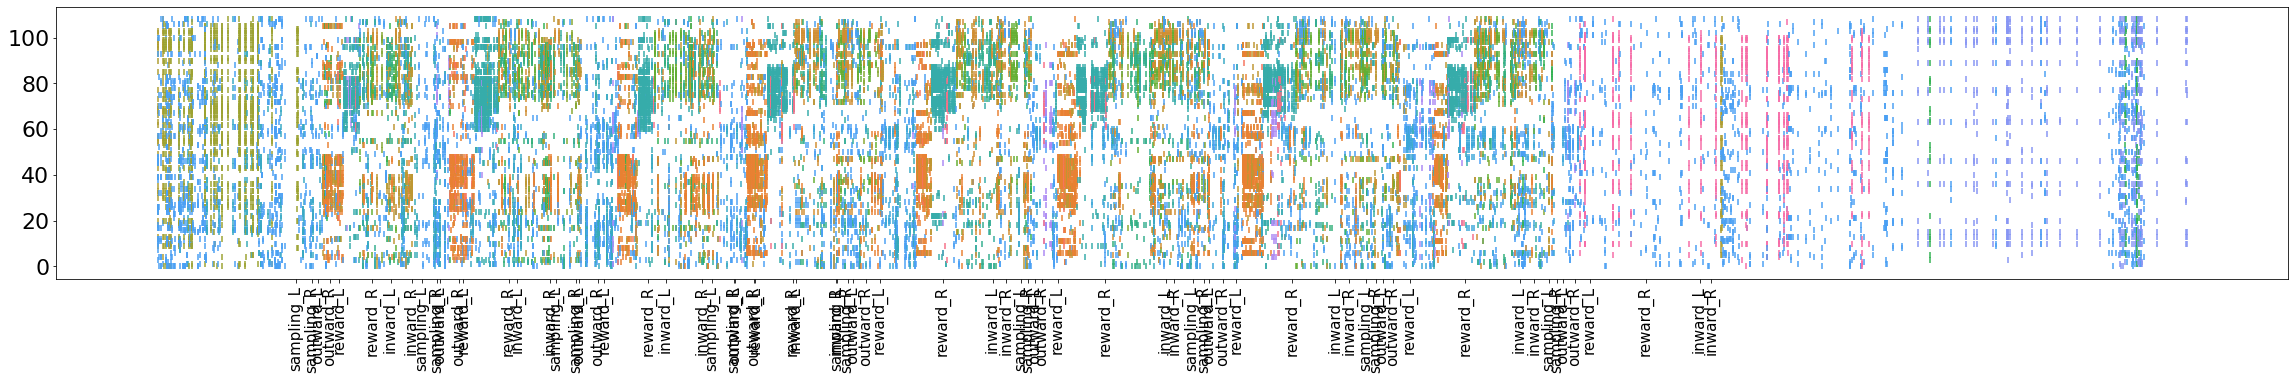

In [ ]:
    figs=plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(figsize=(40,5))

    for ix,seq in enumerate(sorted_seqs):
        a=np.arange(len(seq))/len(sess_info['seqs'])+sess_info['id_peaks'][ix]
        ax.scatter(a,seq,marker='|',color = colorlist[sess_info['ids_clust'][ix]])
    #plt.plot((poprate/np.max(poprate)*sp.shape[0]),alpha=.2)
    #plt.vlines(id_peaks,0,sp.shape[0],alpha=.5)
    #plt.xlim([100,16000])
    #plt.legend()
    all_x_values = []
    labels = []
    for label, x_values in cond_len.items():
        all_x_values.extend(x_values)
        labels.extend([label] * len(x_values))

    ax.set_xticks(all_x_values)
    ax.set_xticklabels(labels, rotation=90, fontsize=15)


    #binary_mask=np.asarray(Masks['conditions'])# if you wnat multiple color for differnt arenas (inwar/outward) uncoment this
    binary_mask2=np.asarray(Masks['phases'])
    for ix in np.unique(binary_mask2):
        label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
        ax.fill_between(np.arange(len(binary_mask2)), -1, STMx1.shape[0], where=binary_mask2 == ix, alpha=0.1,label=label)



        #ax.axhline(x=np.where(binary_mask == ix)[0], color='black', linestyle='--', linewidth=2)
    plt.vlines(x=np.where(abs(np.diff(binary_mask))>0), ymin=0,ymax=STMx1.shape[0],color='black', linestyle='-', linewidth=.71)
    
    # Get the legend
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

    if len(cond_names)>4:
    # Hide the second-to-last legend item (line and text label)
        handles = legend.legendHandles
        labels = legend.texts
        handles[-2].set_visible(False)  # Hide the second-to-last legend item line
        labels[-2].set_visible(False)  # Hide the second-to-last legend item text label
        handles[-1].set_visible(False)  # Hide the second-to-last legend item line
        labels[-1].set_visible(False)  # Hide the second-to-last legend item text label

    plt.xlim(cond_len['arena'][1],cond_len['sleep_learned_after'][0])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x360 with 0 Axes>

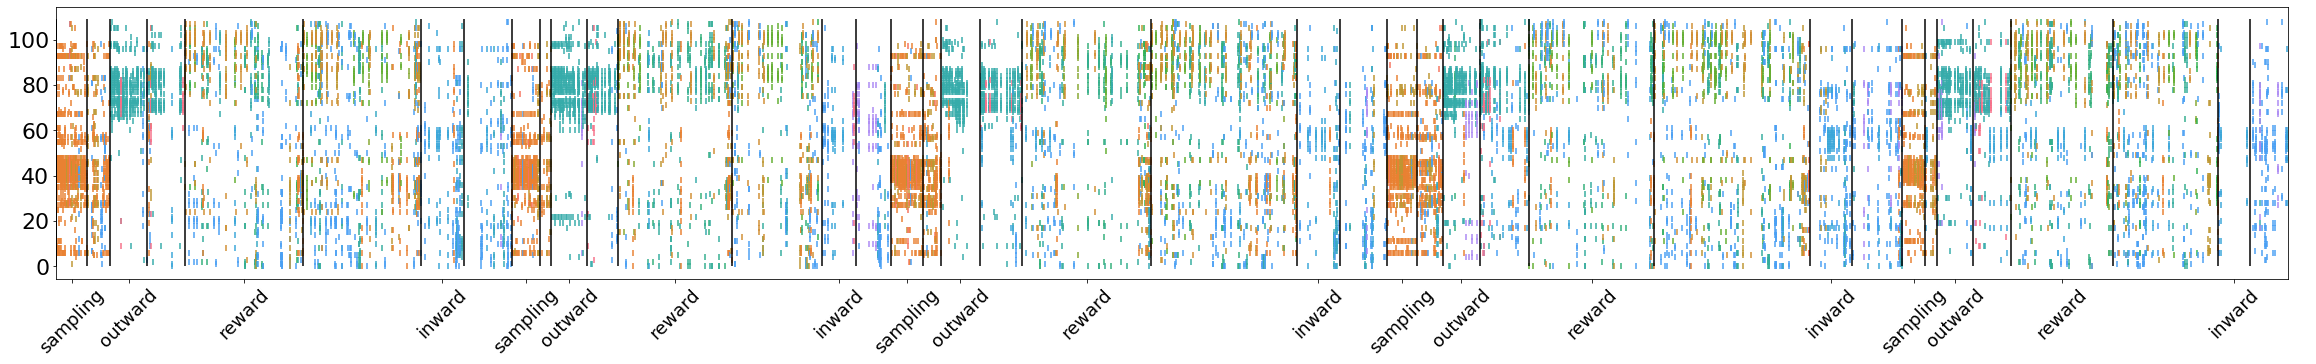

In [ ]:
colorlist[sess_info['ids_clust'][ix]]

IndexError: list index out of range

<Figure size 720x360 with 0 Axes>

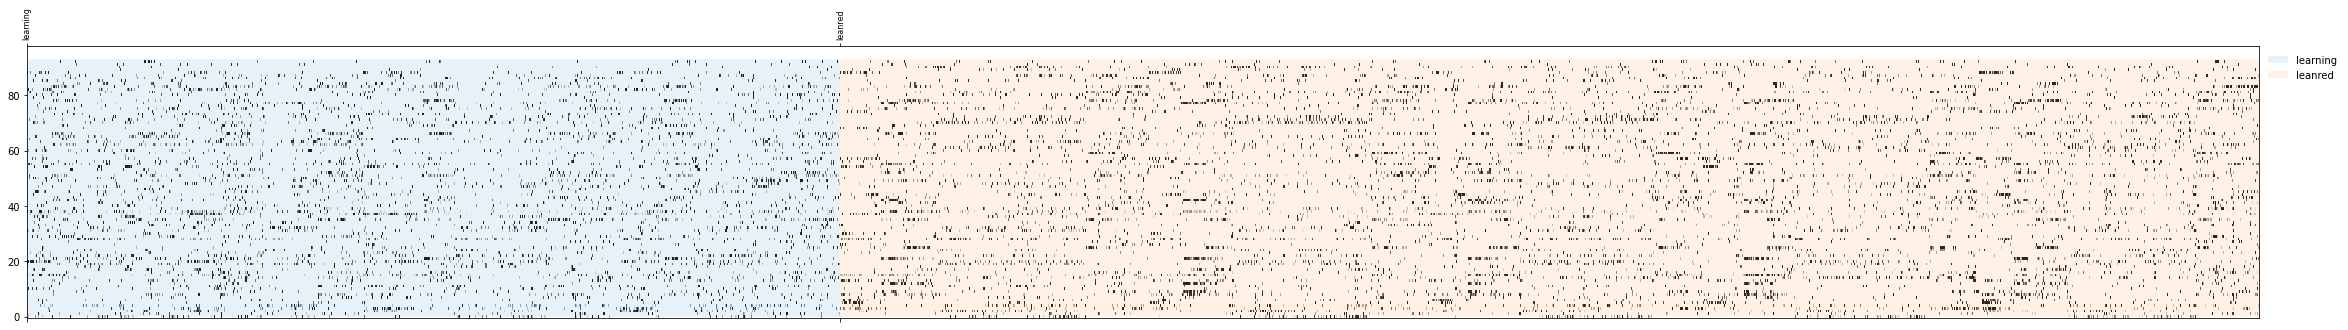

In [ ]:
USfilt=sess_info['extract']
USfilt = stats.zscore(USfilt, axis=1)
transient_raster_plot(USfilt,task_names,task_len,binary_mask)

In [ ]:
transient_raster_plot(Sfilt,task_names,task_len,binary_mask)

NameError: name 'transient_raster_plot' is not defined

## Find the index of each condtion for xtick label

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 22  # You can adjust the font size as needed
plt.rcParams['ytick.labelsize'] = 22  # You can adjust the font size as needed

In [ ]:
{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7,
 'arena_outward_L': 8,
 'arena_outward_R': 9,
 'arena_inward_L': 10,
 'arena_inward_R': 11}

{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7,
 'arena_outward_L': 8,
 'arena_outward_R': 9,
 'arena_inward_L': 10,
 'arena_inward_R': 11}

In [ ]:
import numpy as np


# Initialize list to store all first and last numbers from 'arena' keys
arena_values = []

# Extract first and last number of all 'arena' keys
for key, values in list(cond_len.items()):  # Convert to list to avoid RuntimeError
    if 'arena' in key:
        if len(values) > 0:  # Check if the array is not empty
            # Append first and last number
            arena_values.append(values[0])
            arena_values.append(values[-1])

        # Remove the original 'arena' key
        del cond_len[key]

# Add combined arena data under 'arena' key
cond_len['arena'] = [min(arena_values), max(arena_values)]
binary_mask=np.asarray(Masks['conditions'])
#binary_mask=np.asarray(Masks['phases'])

binary_mask[(binary_mask >= 8) & (binary_mask <= 11)] = 8


ValueError: min() arg is an empty sequence

In [ ]:
# cond_len2={}
# for jj in cond_len.keys():
#     if ('sleep' not in jj) and ('arena' not in jj):
#         cond_len2[jj]=cond_len[jj]

# cond_names2={'sampling_L': 0,
#  'sampling_R': 1,
#  'outward_L': 2,
#  'outward_R': 3,
#  'reward_L': 4,
#  'reward_R': 5,
#  'inward_L': 6,
#  'inward_R': 7,}

# binary_mask2=binary_mask[binary_mask<8]

In [ ]:
cond_names

{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7,
 'arena_outward_L': 8,
 'arena_outward_R': 9,
 'arena_inward_L': 10,
 'arena_inward_R': 11}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x360 with 0 Axes>

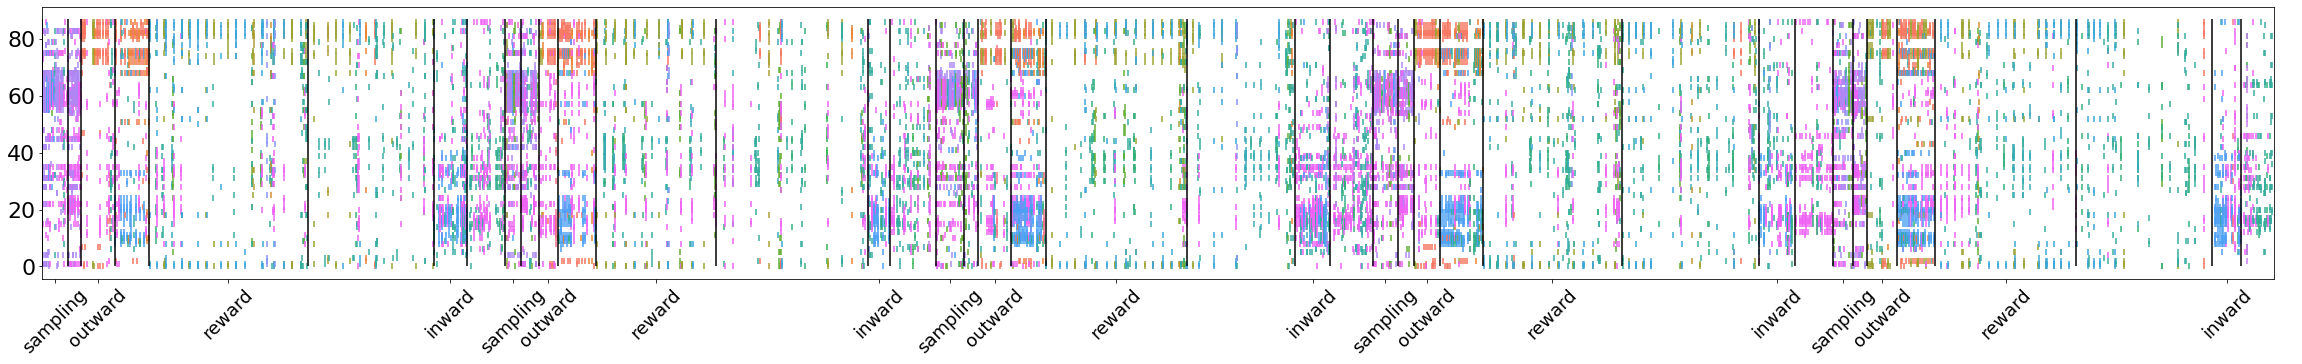

IndexError: list index out of range

<Figure size 720x360 with 0 Axes>

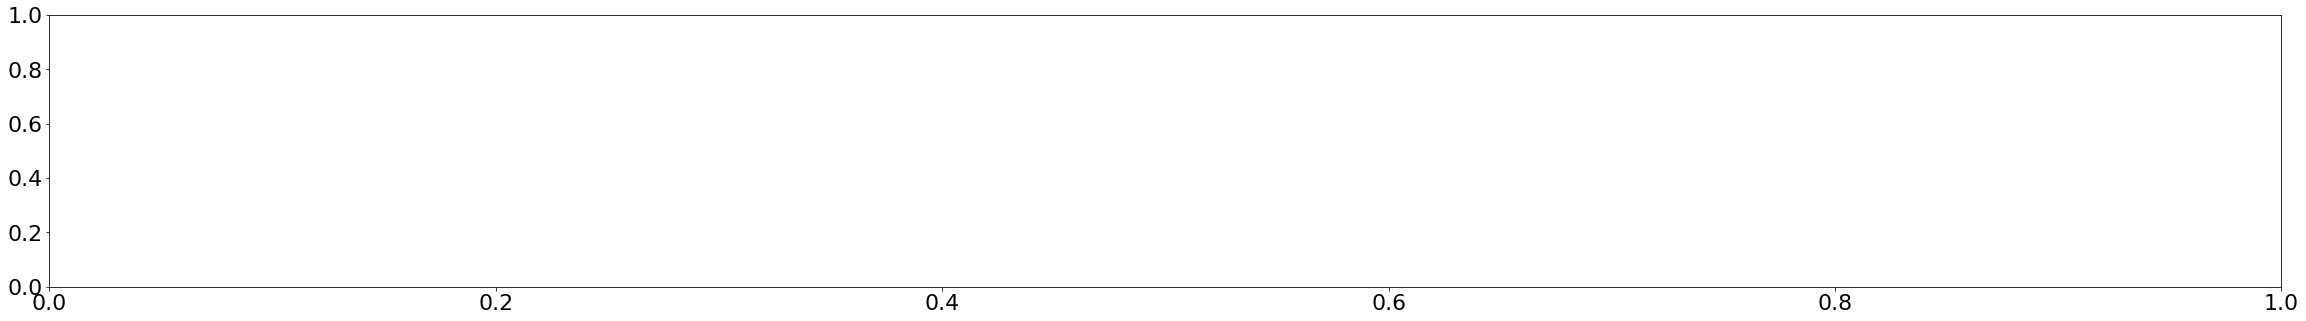

In [ ]:
seq_raster_plot(sess_info,cond_len,sorted_seqs,cond_names,binary_mask)
plt.xlim([0,sess_info['extract'].shape[1]])


In [ ]:
    for label, x_values in cond_len.items():
        all_x_values.extend(x_values)
        labels.extend([label] * len(x_values))

In [ ]:
all_x_values

[13770,
 24463,
 38507,
 49321,
 63506,
 75338,
 90788,
 106854,
 15029,
 26149,
 39970,
 50284,
 64384,
 76337,
 91721,
 107557,
 15514,
 26524,
 40199,
 50994,
 64737,
 76894,
 92529,
 107934,
 16366,
 27930,
 41286,
 52155,
 65870,
 78099,
 93689,
 109064,
 16879,
 28504,
 41598,
 53331,
 66822,
 79408,
 95215,
 110226,
 19912,
 33185,
 45321,
 57003,
 70385,
 83442,
 99116,
 113405,
 21406,
 35420,
 46936,
 60678,
 73192,
 87977,
 103959,
 116695,
 22991,
 37825,
 48806,
 62015,
 74242,
 89321,
 105290,
 117682,
 13770,
 24463,
 38507,
 49321,
 63506,
 75338,
 90788,
 106854,
 15029,
 26149,
 39970,
 50284,
 64384,
 76337,
 91721,
 107557,
 15514,
 26524,
 40199,
 50994,
 64737,
 76894,
 92529,
 107934,
 16366,
 27930,
 41286,
 52155,
 65870,
 78099,
 93689,
 109064,
 16879,
 28504,
 41598,
 53331,
 66822,
 79408,
 95215,
 110226,
 19912,
 33185,
 45321,
 57003,
 70385,
 83442,
 99116,
 113405,
 21406,
 35420,
 46936,
 60678,
 73192,
 87977,
 103959,
 116695,
 22991,
 37825,
 48806

In [ ]:
for kename in cond_len.keys():
    cond_len[kename][0]

{'sampling_L': array([ 13770,  24463,  38507,  49321,  63506,  75338,  90788, 106854],
       dtype=int64),
 'sampling_R': array([ 15029,  26149,  39970,  50284,  64384,  76337,  91721, 107557],
       dtype=int64),
 'outward_L': array([ 15514,  26524,  40199,  50994,  64737,  76894,  92529, 107934],
       dtype=int64),
 'outward_R': array([ 16366,  27930,  41286,  52155,  65870,  78099,  93689, 109064],
       dtype=int64),
 'reward_L': array([ 16879,  28504,  41598,  53331,  66822,  79408,  95215, 110226],
       dtype=int64),
 'reward_R': array([ 19912,  33185,  45321,  57003,  70385,  83442,  99116, 113405],
       dtype=int64),
 'inward_L': array([ 21406,  35420,  46936,  60678,  73192,  87977, 103959, 116695],
       dtype=int64),
 'inward_R': array([ 22991,  37825,  48806,  62015,  74242,  89321, 105290, 117682],
       dtype=int64)}

In [ ]:
def seq_raster_plot(sess_info, cond_len, sorted_seqs, cond_names, binary_mask):
    import matplotlib.pyplot as plt
    import numpy as np

    figs = plt.figure(figsize=(10, 5))
    fig, ax = plt.subplots(figsize=(40, 5))

    # Plot each sequence as a scatter plot
    for ix, seq in enumerate(sorted_seqs):
        # Compute x-values for this sequence (offset by the id_peak value)
        a = np.arange(len(seq)) / len(sess_info['seqs']) + sess_info['id_peaks'][ix]
        ax.scatter(a, seq, marker='|', color=colorlist[sess_info['ids_clust'][ix]])

    # Draw vertical lines at each position in cond_len.values()
    # (assuming cond_len.values() returns arrays of positions)
    plt.vlines(list(cond_len.values()), 0, sess_info['extract'].shape[0], alpha=1, color='k')

    # Compute midpoints for each condition label based on cond_len
    all_x_values = []
    labels = []
    for label, x_values in cond_len.items():
        # Compute the midpoint of the condition range:
        # assuming x_values is an array-like of positions for that condition.
        midpoint = (x_values[0] + x_values[-1]) / 2
        all_x_values.append(midpoint)
        labels.append(label)

    # Set xticks at the midpoints with corresponding labels
    ax.set_xticks(all_x_values)
    ax.set_xticklabels(labels, rotation=45, fontsize=18)

    # Draw vertical lines where the binary_mask changes
    change_indices = np.where(np.abs(np.diff(binary_mask)) > 0)[0]
    plt.vlines(x=change_indices, ymin=0, ymax=sess_info['extract'].shape[0], color='black', linestyle='-', linewidth=1)

    # Add the legend (if there are legend entries from previous plot elements)
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)


In [ ]:
def seq_raster_plot(sess_info,cond_len,sorted_seqs,cond_names,binary_mask):
    figs=plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(figsize=(40,5))

    for ix,seq in enumerate(sorted_seqs):
        a=np.arange(len(seq))/len(sess_info['seqs'])+sess_info['id_peaks'][ix]
        ax.scatter(a,seq,marker='|',color = colorlist[sess_info['ids_clust'][ix]])
    plt.vlines(cond_len.values(),0,sess_info['extract'].shape[0],alpha=1,color='k')

    
    #plt.plot((poprate/np.max(poprate)*sp.shape[0]),alpha=.2)
    #plt.vlines(id_peaks,0,sp.shape[0],alpha=.5)
    #plt.xlim([100,16000])
    #plt.legend()
    all_x_values = []
    labels = []
    for label, x_values in cond_len.items():
        all_x_values.extend(x_values)
        labels.extend([label] * len(x_values))

    ax.set_xticks(all_x_values)
    ax.set_xticklabels(labels, rotation=45, fontsize=18)


    #binary_mask=np.asarray(Masks['conditions'])# if you wnat multiple color for differnt arenas (inwar/outward) uncoment this

    # for ix in np.unique(binary_mask):
    #     label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
    #     ax.fill_between(np.arange(len(binary_mask)), -1, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)



        #ax.axhline(x=np.where(binary_mask == ix)[0], color='black', linestyle='--', linewidth=2)
    plt.vlines(x=np.where(abs(np.diff(binary_mask))>0), ymin=0,ymax=sess_info['extract'].shape[0],color='black', linestyle='-', linewidth=1)
    
    # Get the legend
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

    # if len(cond_names)>4:
    # # Hide the second-to-last legend item (line and text label)
    #     handles = legend.legendHandles
    #     labels = legend.texts
    #     handles[-2].set_visible(False)  # Hide the second-to-last legend item line
    #     labels[-2].set_visible(False)  # Hide the second-to-last legend item text label
    #     handles[-1].set_visible(False)  # Hide the second-to-last legend item line
    #     labels[-1].set_visible(False)  # Hide the second-to-last legend item text label

    #plt.legend()

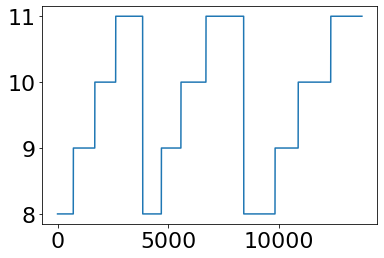

In [ ]:
plt.plot(Masks['conditions'])

In [ ]:
list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]

NameError: name 'ix' is not defined

In [ ]:
cond_len

{'sampling_L': array([ 13770,  24463,  38507,  49321,  63506,  75338,  90788, 106854],
       dtype=int64),
 'sampling_R': array([ 15029,  26149,  39970,  50284,  64384,  76337,  91721, 107557],
       dtype=int64),
 'outward_L': array([ 15514,  26524,  40199,  50994,  64737,  76894,  92529, 107934],
       dtype=int64),
 'outward_R': array([ 16366,  27930,  41286,  52155,  65870,  78099,  93689, 109064],
       dtype=int64),
 'reward_L': array([ 16879,  28504,  41598,  53331,  66822,  79408,  95215, 110226],
       dtype=int64),
 'reward_R': array([ 19912,  33185,  45321,  57003,  70385,  83442,  99116, 113405],
       dtype=int64),
 'inward_L': array([ 21406,  35420,  46936,  60678,  73192,  87977, 103959, 116695],
       dtype=int64),
 'inward_R': array([ 22991,  37825,  48806,  62015,  74242,  89321, 105290, 117682],
       dtype=int64)}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\hamed\AppData\Local\Temp\ipykernel_1936\3239914874.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


<Figure size 720x360 with 0 Axes>

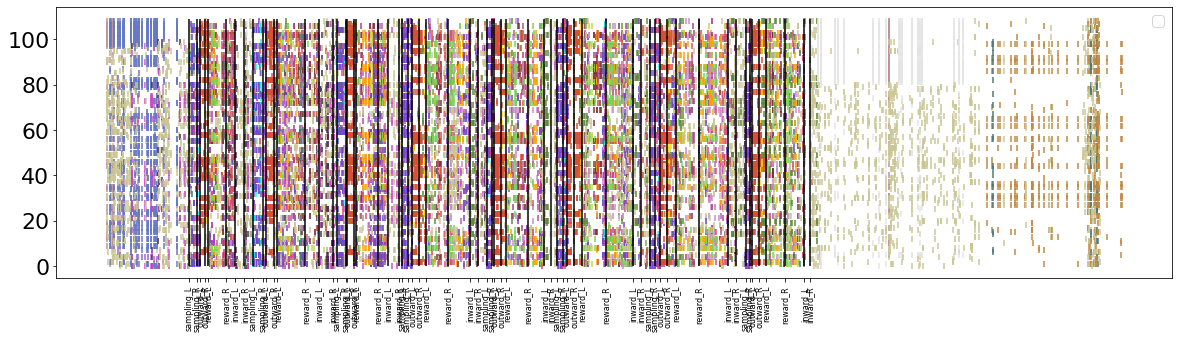

In [ ]:
figs=plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(20,5))

for ix,seq in enumerate(sess_info['seqs']):
    a=np.arange(len(seq))/len(sess_info['seqs'])+sess_info['id_peaks'][ix]
    ax.scatter(a,seq,marker='|',color = colorlist[sess_info['ids_clust'][ix]])
#plt.plot((poprate/np.max(poprate)*sp.shape[0]),alpha=.2)
plt.vlines(cond_len.values(),0,sess_info['extract'].shape[0],alpha=1,color='k')
#plt.xlim([100,16000])
plt.legend()
all_x_values = []
labels = []
for label, x_values in cond_len.items():
    all_x_values.extend(x_values)
    labels.extend([label] * len(x_values))

ax.set_xticks(all_x_values)
ax.set_xticklabels(labels, rotation=90, fontsize=8)


binary_mask=np.asarray(Masks['conditions'])# if you wnat multiple color for differnt arenas (inwar/outward) uncoment this

# for ix in np.unique(binary_mask):
#     label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
#     ax.fill_between(np.arange(len(binary_mask)), 0, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)
#     #ax.axhline(x=np.where(binary_mask == ix)[0], color='black', linestyle='--', linewidth=2)



# Get the legend
legend = ax.legend()


# Hide the second-to-last legend item (line and text label)
handles = legend.legendHandles
labels = legend.texts
# handles[-2].set_visible(False)  # Hide the second-to-last legend item line
# labels[-2].set_visible(False)  # Hide the second-to-last legend item text label
# handles[-1].set_visible(False)  # Hide the second-to-last legend item line
# labels[-1].set_visible(False)  # Hide the second-to-last legend item text label

#plt.legend()
# Creating a dummy plot with dots at each x-tick position
#ax.plot(list(cond_len.values()), [1]*len(cond_len), 'o')  # 'o' creates a dot for each point

    
#ax.set_colorbar(cmap=colorlist)

In [ ]:
for ix in np.unique(binary_mask):
    label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
    ax.fill_between(np.arange(len(binary_mask)), 0, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)
legend = ax.legend()
handles = legend.legendHandles
labels = legend.texts
handles[-2].set_visible(False)  # Hide the second-to-last legend item line
labels[-2].set_visible(False)  # Hide the second-to-last legend item text label
handles[-1].set_visible(False)  # Hide the second-to-last legend item line
labels[-1].set_visible(False)  # Hide the second-to-last legend item text label


C:\Users\hamed\AppData\Local\Temp\ipykernel_1336\182375119.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


In [ ]:
np.sum(binary_mask == ix,)

4340

In [ ]:
np.arange(len(binary_mask))

array([    0,     1,     2, ..., 13767, 13768, 13769])

In [ ]:
binary_mask

array([ 8.,  8.,  8., ..., 12., 12., 12.])

In [ ]:
cond_names

{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7}

In [ ]:
ix

8.0

In [ ]:
np.where(np.asarray(list(cond_names.values()))==ix)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

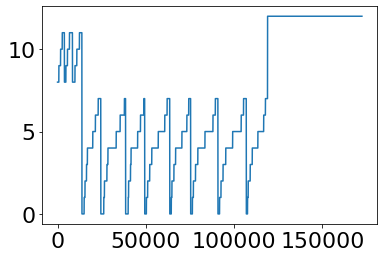

In [ ]:
plt.plot(binary_mask)

In [ ]:
binary_mask

array([ 8.,  8.,  8., ..., 12., 12., 12.])

In [ ]:
cond_names

{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7}

In [ ]:
ix

8.0

In [ ]:
np.where(np.asarray(list(cond_names.values()))==ix)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

[Text(13770, 0, 'sampling_L'),
 Text(24463, 0, 'sampling_L'),
 Text(38507, 0, 'sampling_L'),
 Text(49321, 0, 'sampling_L'),
 Text(63506, 0, 'sampling_L'),
 Text(75338, 0, 'sampling_L'),
 Text(90788, 0, 'sampling_L'),
 Text(106854, 0, 'sampling_L'),
 Text(15029, 0, 'sampling_R'),
 Text(26149, 0, 'sampling_R'),
 Text(39970, 0, 'sampling_R'),
 Text(50284, 0, 'sampling_R'),
 Text(64384, 0, 'sampling_R'),
 Text(76337, 0, 'sampling_R'),
 Text(91721, 0, 'sampling_R'),
 Text(107557, 0, 'sampling_R'),
 Text(15514, 0, 'outward_L'),
 Text(26524, 0, 'outward_L'),
 Text(40199, 0, 'outward_L'),
 Text(50994, 0, 'outward_L'),
 Text(64737, 0, 'outward_L'),
 Text(76894, 0, 'outward_L'),
 Text(92529, 0, 'outward_L'),
 Text(107934, 0, 'outward_L'),
 Text(16366, 0, 'outward_R'),
 Text(27930, 0, 'outward_R'),
 Text(41286, 0, 'outward_R'),
 Text(52155, 0, 'outward_R'),
 Text(65870, 0, 'outward_R'),
 Text(78099, 0, 'outward_R'),
 Text(93689, 0, 'outward_R'),
 Text(109064, 0, 'outward_R'),
 Text(16879, 0, 'rew

<Figure size 720x360 with 0 Axes>

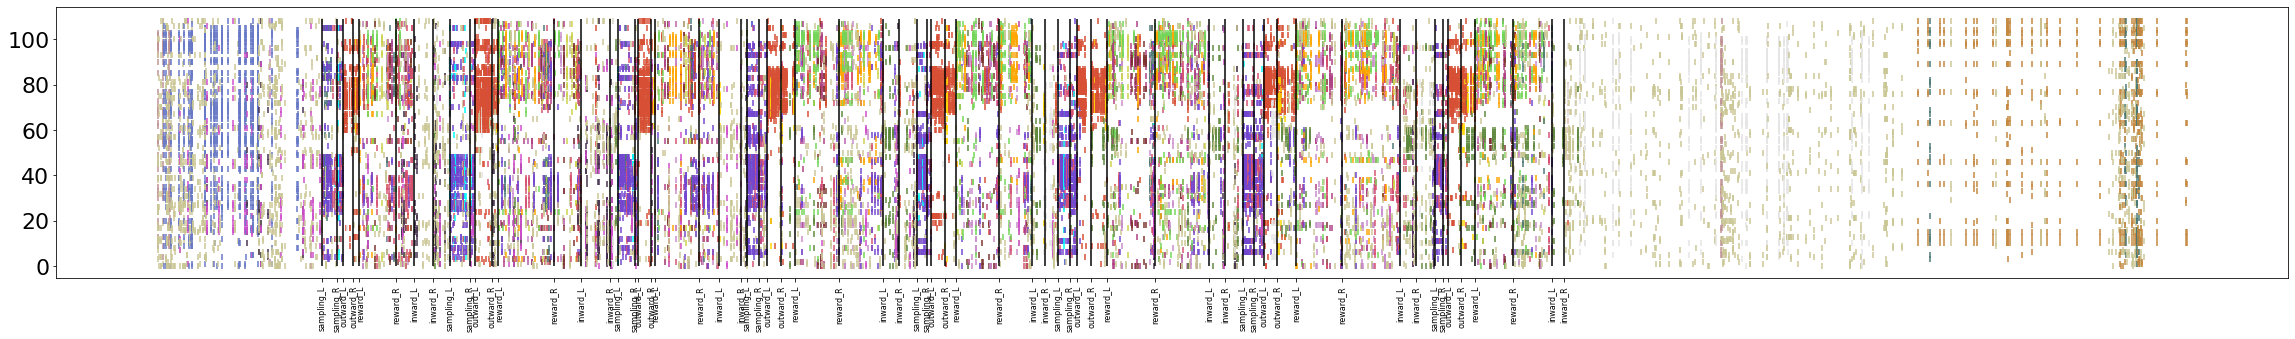

In [ ]:
figs=plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(40,5))

for ix,seq in enumerate(sorted_seqs):
    a=np.arange(len(seq))/len(sorted_seqs)+sess_info['id_peaks'][ix]
    ax.scatter(a,seq,marker='|',color = colorlist[sess_info['ids_clust'][ix]])
#plt.plot((poprate/np.max(poprate)*sp.shape[0]),alpha=.2)
#plt.vlines(id_peaks,0,sp.shape[0],alpha=.5)
#plt.xlim([100,16000])
plt.vlines(cond_len.values(),0,sess_info['extract'].shape[0],alpha=1,color='k')

# Setting the x-ticks to the values from the data


all_x_values = []
labels = []
for label, x_values in cond_len.items():
    all_x_values.extend(x_values)
    labels.extend([label] * len(x_values))



# for ix in np.unique(binary_mask):
#     label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==int(ix))[0][0]]
#     ax.fill_between(np.arange(len(binary_mask)), 0, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)
# plt.legend()
# Set x-ticks and labels
ax.set_xticks(all_x_values)
ax.set_xticklabels(labels, rotation=90, fontsize=8)


# for label, values in cond_len.items():
#     ax.set_xticks(values)

# # Setting the x-tick labels to the keys from the data, with a rotation for better readability
#     ax.set_xticklabels([label]*len(values), rotation=45, ha="right")

    #ax.plot(values, label=label)


In [ ]:
np.asarray(list(cond_names.values()))

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
np.asarray(list(cond_names.values()))==int(ix)

array([False, False, False, False, False, False, False, False])

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 720x360 with 0 Axes>

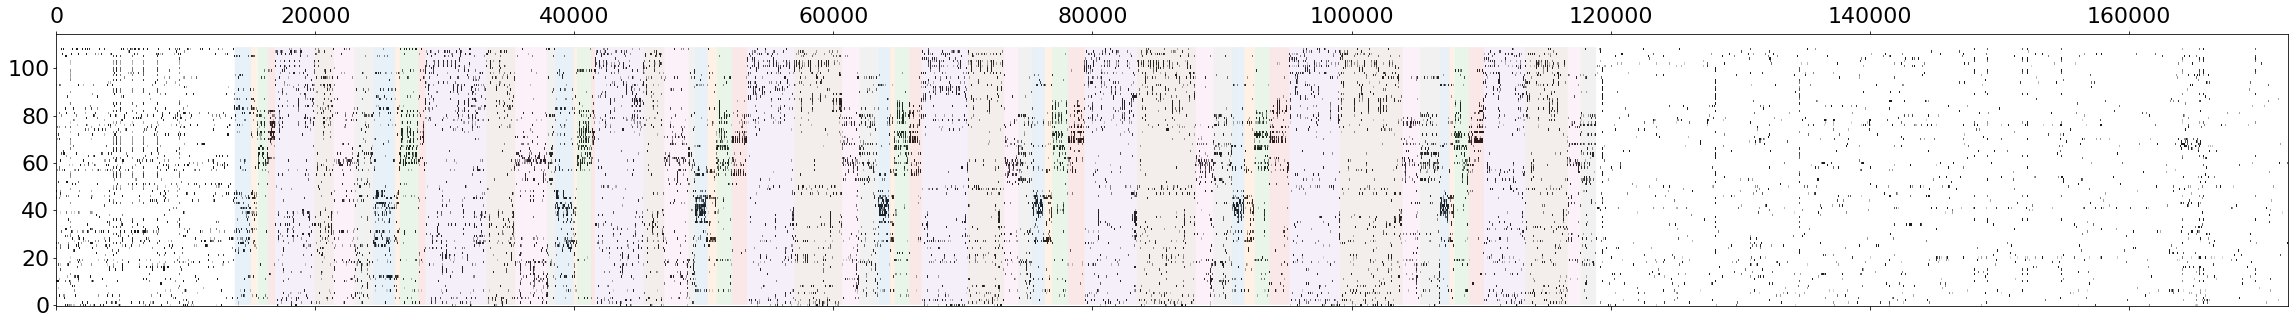

In [ ]:
figs=plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(40,5))
ax.matshow(Sfilt ,vmin =0, vmax=3, aspect='auto', cmap='gray_r',origin='lower',alpha=.9)
for ix in np.unique(binary_mask):
    label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
    ax.fill_between(np.arange(len(binary_mask)), 0, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)
plt.vlines(x=np.where(abs(np.diff(binary_mask))>0), ymin=0,ymax=sess_info['extract'].shape[0],color='black', linestyle='--', linewidth=.5)

plt.legend()

all_x_values = []
labels = []
for label, x_values in cond_len.items():
    all_x_values.extend(x_values)
    labels.extend([label] * len(x_values))
ax.set_xticks(all_x_values)
ax.set_xticklabels(labels, rotation=90, fontsize=8)
plt.xlim(cond_len['arena'][1],cond_len['sleep_learned_after'][0])

In [ ]:
#transient_raster_plot(cond_names,cond_len,binary_mask)

In [ ]:
def transient_raster_plot(Sfilt,cond_names,cond_len,binary_mask):
    figs=plt.figure(figsize=(10,5))
    fig, ax = plt.subplots(figsize=(40,5))
    ax.matshow(Sfilt ,vmin =0, vmax=3, aspect='auto', cmap='gray_r',origin='lower',alpha=.9)
    for ix in np.unique(binary_mask):
        label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
        ax.fill_between(np.arange(len(binary_mask)), 0, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

    all_x_values = []
    labels = []
    for label, x_values in cond_len.items():
        all_x_values.extend(x_values)
        labels.extend([label] * len(x_values))
    ax.set_xticks(all_x_values)
    ax.set_xticklabels(labels, rotation=90, fontsize=8)
    
    #plt.xlim(cond_len['arena'][1],cond_len['sleep_learned_after'][0])

In [ ]:

def plot_seqs(ti,vec,fs):
    # thsi is for plotting
    fig=plt.figure(figsize=(14,8))
    templates={}
    tsamples=[]
    for nt in range(len(ti['clist'])):

        # if len(np.where(np.array(ti['exclude'])==nt)[0])>0:
        #     continue

        print(nt)
        clist=ti['clist'][nt]
        samples=np.array(vec)[clist,:,:]
        dummy,template = mot.average_sequence(samples)
        templates[nt]=template/fs

        samples=np.array(vec)[clist,:,:]
        tsamples.append(mot.t_from_mat(list(samples),fs))

    dy=0.2
    ctr=0
    for nt in templates.keys():
        ax=fig.add_axes([0.1,0.85-ctr*dy,0.8,0.1])
        ctr += 1
        isort=np.argsort(templates[nt])
        print(nt,np.array(templates[nt]).shape)
        #mot.plot_samples(templates,isort,tsamples[nt][0:10],ax,1,nc=int(nt))
        seq_nbr=len(tsamples[nt])
        plot_samples2(templates,isort,tsamples[nt][0:10],seq_nbr,ax,1,nc=int(nt))

    plt.show(block=0)




def plot_samples2(templates,isort,samples,seq_nbr,ax,fac=1,nc=-1):
    cmap=plt.get_cmap('tab10')
    ncells=len(templates[list(templates.keys())[0]])
    linsp=np.arange(1,ncells+1)

    nshift=0
    for tmpl in templates.values():
        #print(templates, tmpl)
        if nc==-1:
            ax.plot(nshift+tmpl[isort]*fac, linsp, '.r') 
        else:
            colrgb=np.array(cmap.colors[np.mod(nc,10)]).reshape(1,3)
            ax.plot(nshift+tmpl[isort]*fac, linsp, '.', color=colorlist[nc]) 
        nshift += .21
        
    for nsmpl in range(len(samples)):
        ax.plot(nshift+samples[nsmpl][isort]*fac,linsp, '.k')
        ax.text(3.1,len(isort)+len(isort)/20,'seq # = '+str(seq_nbr),fontsize=16)

        nshift +=.21
        
    ax.set_xlabel('Seq. #',fontsize=16)
    ax.set_ylabel('Cluster '+str(nc)+' \nSort seq#',fontsize=16)

# Apply the masks and get the part of data you need. 

In [ ]:
cond_number

{'sleep_learned_after': 12}

In [ ]:
# plt.plot(np.asarray(Masks['conditions'])==6,alpha=.9)
# plt.plot(np.asarray(Masks['conditions'])==7,alpha=.9)


# plt.plot(np.asarray(Masks['conditions'])==2,alpha=.9)
# plt.plot(np.asarray(Masks['conditions'])==3,alpha=.9)
# plt.plot(sess_info['lin_pos'],alpha=.2)
# plt.eventplot(sess_info['id_peaks'])

# plt.plot(np.asarray(sess_info['pop_rate'])/100)
# plt.xlim([8400,10500])



In [ ]:
cond_names

{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7,
 'arena_outward_L': 8,
 'arena_outward_R': 9,
 'arena_inward_L': 10,
 'arena_inward_R': 11,
 'sleep_learned_after': 12}

(0.0, 50.0)

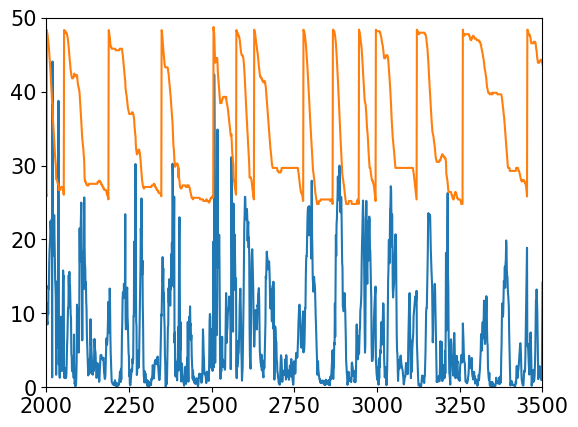

In [ ]:
plt.plot(sess_info['speed'])
plt.plot(50*np.asarray(sess_info['lin_pos']))
plt.xlim([2000,3500])
plt.ylim([0,50])

### Save data of outward runs for Place feild analysis

In [ ]:

# add the mask for speed. speed threshold is set to 5.
smooth_speed=mot.smooth_signal(sess_info['speed'], 13)# moving average over .5  second
Masks['speed_seq']=np.asarray(smooth_speed)[sess_info['id_peaks']]>speed_thr
Masks['speed']=smooth_speed>speed_thr


# select the data you need. Sessen number, epeoch, .... Selected data will be saved with corresposing name. Inward and outward data will be used by place filed code. 
sessin_numbers=np.arange(len(session_mask))#[4,5,6,7][0,1,2,3]##np.arange(len(session_mask))
#sessin_numbers=[6]
#sessin_numbers=[0,1,2,3,4,5,6,7] # soecify which session you want to work with
#celid=23# number of sample cell to show in the plot

#cond_number=[3] # conditon name (outwards)
#cond_number=[8,9,10,11] # inwards
#cond_number=[0,1] # sampling
#cond_number=[6,7] # reward
for cond_number in ([2,3]):
        
    trial_type=1 # 1 is correct       0 is failed

    if trial_type==1:
        type_name='correct'
    elif trial_type==0:
        type_name='failed'



    phase=None#,1 # 0 is learning,    1 is learned,  None is both
    if phase==None:
        phase_name='all'
    elif phase==0:
        phase_name='learning'
    elif phase==1:
        phase_name='learned'
            


    # odd_even=1# even trials
    # run_data_e=mot.apply_masks(sess_info,Masks,cond_number,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
    # #plt.title(run_data_e['sess_name']+' (even) ('+ run_data_e['phase_name']+') ('+run_data_e['cond_name'] +')')

    # odd_even=0# odd trials
    # run_data_o=mot.apply_masks(sess_info,Masks,cond_number,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
    # #plt.title(run_data_e['sess_name']+' (odd) ('+ run_data_e['phase_name']+') ('+run_data_e['cond_name'] +')')

    odd_even=None# all trials
    run_data_all=mot.apply_masks_test(sess_info,Masks,[cond_number],cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)


    reversed_mapping = {v: k for k, v in cond_names.items()}
    print(reversed_mapping.get(cond_number,'Key not found'))
    animal_direction=reversed_mapping.get(cond_number,'Key not found')
    #animal_direction = mot.find_condition(cond_number,cond_names)
    #print(animal_direction)

    # with open(savefolder+fol+animal_direction+'_'+ phase_name+'_'+type_name+'_'+descriotor+'_'+cell_types+'test_neworder','wb') as f:
    #     pickle.dump(dict(run_data_all), f)   
    #plt.title(run_data_e['sess_name']+' (all) ('+ run_data_e['phase_name']+') ('+run_data_e['cond_name'] +')')


c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_data['seqs']=np.asarray(sess_info['seqs'])[mask_sess_burst & mask_cond_burst & mask_odd_seqs & mask_correct_seqs & mask_phase_seqs & Masks['speed_seq']]


outward_L
outward_R


In [ ]:
savefolder+fol+animal_direction+'_'+ phase_name+'_'+type_name+'_'+descriotor+'_'+cell_types+'test_neworder'

'C:/Users/hamed/Desktop/Hamed/Github/TP7/results/485outward_R_all_correct_all_days_original_bursts_neworder1s_transientsaranaandsleep_Alltest_neworder'

In [ ]:

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Get the first four colors
first_four_colors = color_cycle[:4]



## Finde the precentage of the place cells in a sequences

In [ ]:
# sig_pc_idx=np.where(significant_pc)
# pc_frac=mot.pc_faction_in_sequnce(Masks,sess_info,sig_pc_idx,cond_names)
# plt.rcParams.update({'font.size': 16})
# plt.rcParams['axes.titlesize'] = 16
# plt.rcParams['xtick.labelsize'] = 14  # You can adjust the font size as needed
# plt.rcParams['ytick.labelsize'] = 14  # You can adjust the font size as needed


# for mod in pc_frac.keys():
#     for cor in pc_frac[mod].keys():
#         fig, ax = plt.subplots(1, 1, figsize=(5, 4))

#         sns.swarmplot(data=pc_frac[mod][cor],ax=ax,size=3)
#         mot.significance_chekc(pc_frac[mod][cor],ax,first_four_colors)
#         ax.set_title(fol+'_'+mod+'_'+cor+'_'+cell_types)
#         ax.set_ylim([0,1.1])
#         ax.set_ylabel("% of PC in a seqeunce")

## plot the distribution of each cluster

In [ ]:
Cluster_cunts_all={}
phase_c_f=1
state_c_f=1
n_clusters=np.max(sess_info['ids_clust'])+1

if phase_c_f==1:
    datamaode='Learned'
elif phase_c_f==0:
    datamaode='Learning'


if state_c_f==1:
    trialsmode='Correct'
elif state_c_f==0:
    trialsmode='Failed'



for icls,cls in enumerate(np.unique(sess_info['ids_clust'])):# itterat on clusters
    Cluster_cunts={}

    mas_clstr=(sess_info['ids_clust']==cls)# mask of one cluster

    learning_or_learned_mask=np.asarray(Masks['bursts_phase'])==phase_c_f
    correct_or_failed_mask= np.asarray(Masks['correct_failed_seqs'])==state_c_f

    dd=np.asarray(Masks['bursts_cond'])[mas_clstr & correct_or_failed_mask  & learning_or_learned_mask]
    
    
    # bursts on one cluster
    for kk in range(len(cond_names)):# itteration on condtions
        sumsclstr=[]
        #for dk in range(len(cond_names)):

        if list(cond_names.items())[kk][1]==kk:
            Cluster_cunts[list(cond_names.items())[kk][0]]=np.sum(dd==kk)

    Cluster_cunts_all[str(icls)]=Cluster_cunts



In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# plt.rcParams.update({'font.size': 19})
# plt.rcParams['axes.titlesize'] = 19  # Set the title font size
# plt.rcParams['xtick.labelsize'] = 11  # You can adjust the font size as needed
# plt.rcParams['ytick.labelsize'] = 15  # You can adjust the font size as needed

# j = 4#int(np.ceil(np.sqrt(n_clusters)))
# k = 5#int(np.ceil(n_clusters / j))
# fig, axes = plt.subplots(j, k, figsize=(14, 8), sharex=True, sharey=True)
# axes = axes.flatten()

# for cltr_nbr_data in Cluster_cunts_all.keys():


# # Convert the data to a format suitable for Seaborn


#     merged_data = {'sampling': Cluster_cunts_all[cltr_nbr_data]['sampling_L'] + Cluster_cunts_all[cltr_nbr_data]['sampling_R'],
#                'outward': Cluster_cunts_all[cltr_nbr_data]['outward_L_center'] + Cluster_cunts_all[cltr_nbr_data]['outward_L_side'] + Cluster_cunts_all[cltr_nbr_data]['outward_R_center'] + Cluster_cunts_all[cltr_nbr_data]['outward_R_side'],
#                'reward': Cluster_cunts_all[cltr_nbr_data]['reward_L'] + Cluster_cunts_all[cltr_nbr_data]['reward_R'],
#                'inward': Cluster_cunts_all[cltr_nbr_data]['inward_L_side'] + Cluster_cunts_all[cltr_nbr_data]['inward_L_center'] + Cluster_cunts_all[cltr_nbr_data]['inward_R_side'] + Cluster_cunts_all[cltr_nbr_data]['inward_R_center']}

#     data_list = [{'Category': key, 'Value': value} for key, value in merged_data.items()]

#     # Create a DataFrame from the data
#     import pandas as pd
#     df = pd.DataFrame(data_list)

#     # Set the plot style (optional)

#     # Create a bar plot using Seaborn
#     #plt.figure(figsize=(5, 3))
#     sns.set()
#     #colors = sns.color_palette("default", n_colors=4)
    
#     current_palette = sns.color_palette()
#     sns.set(style="whitegrid")

#     sns.barplot(x='Category', y='Value', data=df, ax=axes[int(cltr_nbr_data)],palette=current_palette)

#     # Rotate x-axis labels for better readability
#     #axes[int(cltr_nbr_data)].set_xticks(rotation=90, ha='right')

#     # # Adding labels and title
#     #axes[int(cltr_nbr_data)].set_xlabel('Consitions')
#     axes[int(cltr_nbr_data)].set_xlabel('',fontsize=15)
#     axes[int(cltr_nbr_data)].set_ylabel('Sequence #' if int(cltr_nbr_data) % k == 0 else '',fontsize=16)
#     axes[int(cltr_nbr_data)].set_title('Cluster '+ cltr_nbr_data,fontsize=20)
#     # #plt.ylim([0,120])
#     # # Display the plot

# for i in range(n_clusters, j * k):
#     fig.delaxes(axes[i])

# plt.suptitle(fol+' '+datamaode+' '+trialsmode,fontsize=22)
# plt.tight_layout()
# plt.show()


In [ ]:
# colorlist=["#FFD700",
# "#00FFFF",
# "#7346d0",
# "#72d658",
# "#d65171",
# "#c09294",
# "#6678c6",
# "#ae3e83",
# "#FFA500",#
# "#4a7875",
# "#cdd24b",
# "#7b332e",
# "#c98ccc",
# "#d74f34",
# "#45314e",
# "#cf4dcc",
# "#5f893e",
# "#cac795",
# "#c48840",
# "#4f2a7e"]

# colorlist[-1]='#E5E5E5'# make bad cluster gray

In [ ]:
tasks=['sampling','outward','reward','inward']


## Plot the distribution of different conditions

In [ ]:
cond_names

{'sampling_L': 0,
 'sampling_R': 1,
 'outward_L': 2,
 'outward_R': 3,
 'reward_L': 4,
 'reward_R': 5,
 'inward_L': 6,
 'inward_R': 7,
 'arena_outward_L': 8,
 'arena_outward_R': 9,
 'arena_inward_L': 10,
 'arena_inward_R': 11,
 'sleep_learned_after': 12}

c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_data['seqs']=np.asarray(sess_info['seqs'])[mask_sess_burst & mask_cond_burst & mask_odd_seqs & mask_correct_seqs & mask_phase_seqs & Masks['speed_seq']]
c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_data['seqs']=np.asarray(sess_info['seqs'])[mask_sess_burst & mask_cond_burst & mask_odd_seqs & mask_correct_seqs & mask_phase_seqs & Masks['speed_seq']]
c:\Users\hamed\Desktop\Hamed

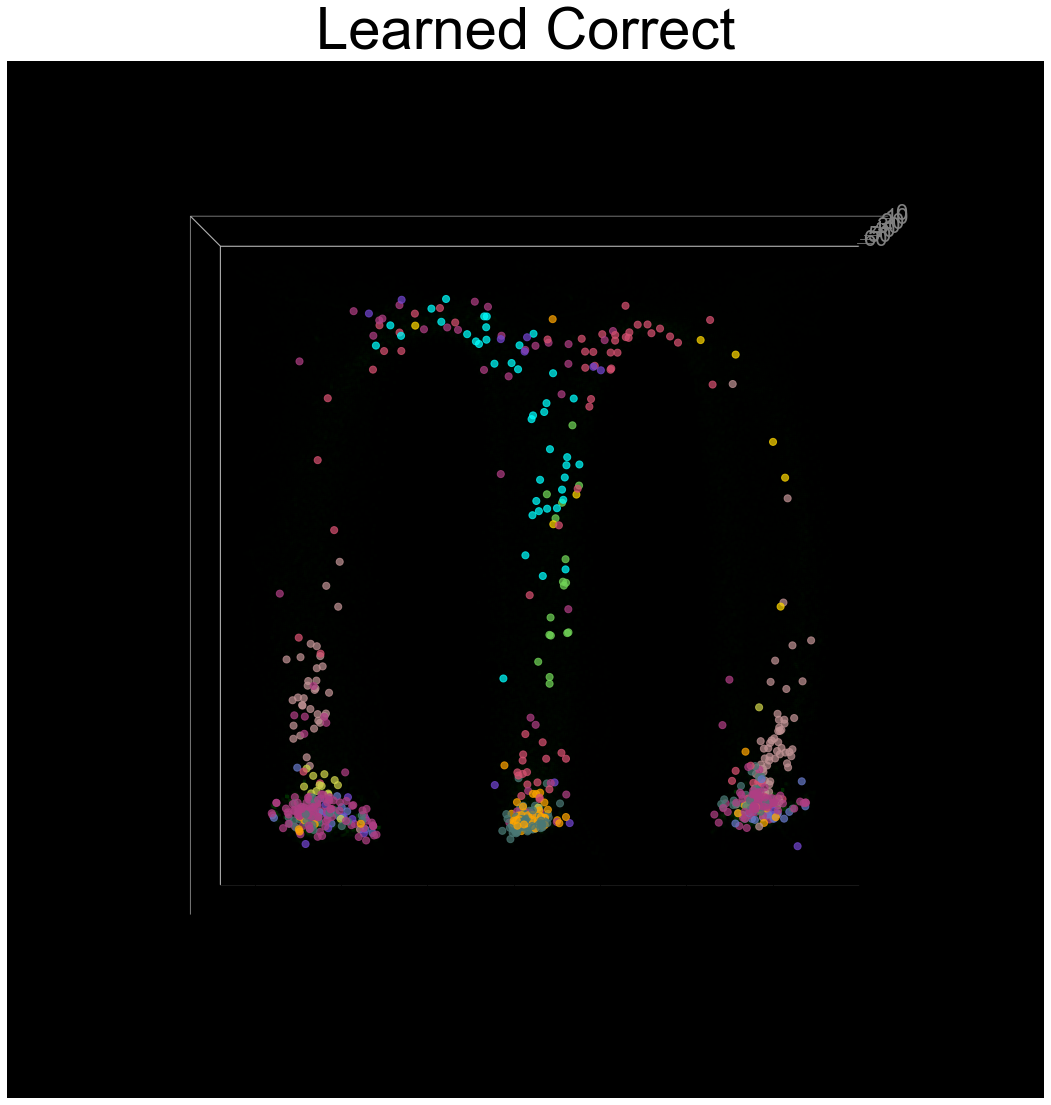

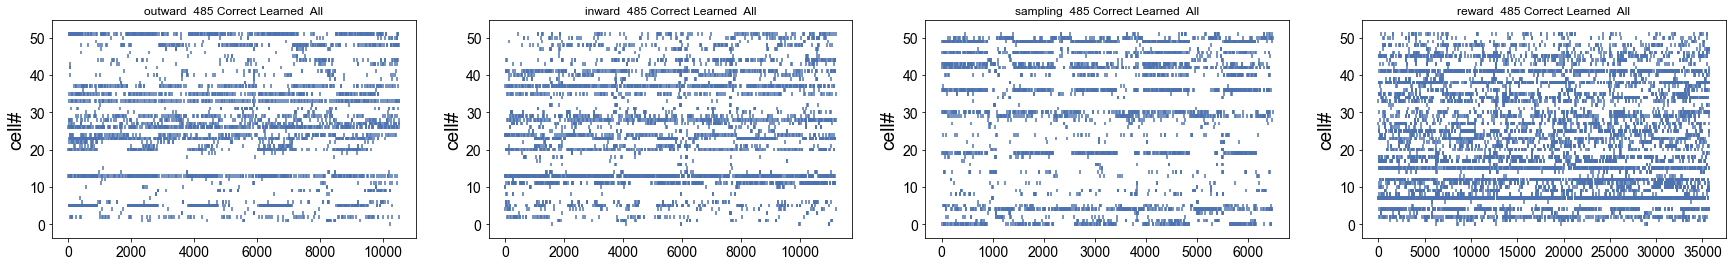

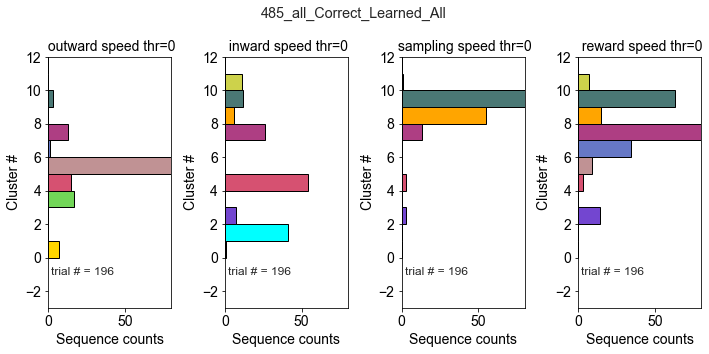

In [ ]:
#viridis_cmap = plt.get_cmap('viridis', n_clusters)

plt.rcParams.update({'font.size': 19})
plt.rcParams['axes.titlesize'] = 19  # Set the title font size
plt.rcParams['xtick.labelsize'] = 14  # You can adjust the font size as needed
plt.rcParams['ytick.labelsize'] = 14  # You can adjust the font size as needed


cond_numbers={}
cond_numbers['outward']=[2,3] # conditon name (outwards)
cond_numbers['inward']=[6,7] # inwards
cond_numbers['sampling']=[0,1] # sampling
cond_numbers['reward'] =[4,5] # reward

trial_type=1# 1 is correct       0 is failed
phase=1# 0 is learning,    1 is learned,  None is both


figs=plt.figure(figsize=(60,60))
ax5s=figs.add_axes([1/len(tasks),0.1,1/len(tasks)-.01,.4],projection='3d', facecolor='white')
#figs.patch.set_facecolor('black')




if trial_type==1:
    type_name='Correct'
elif trial_type==0:
    type_name='Failed'



if phase==None:
    phase_name='All'
elif phase==0:
    phase_name='Learning'
    color='blue'
elif phase==1:
    phase_name='Learned'
    color='red'

fig2,ax2=plt.subplots(1,4,figsize=(30,4))

fig,ax=plt.subplots(1,4,figsize=(10,5))
sns.set(style="darkgrid")
odd_even=None# all trials
cond_clst_idx={}
for icond,cond_number in enumerate(cond_numbers.keys()):

    name_cond=phase_name+' '+type_name

    if ('outward' in cond_number) | ('inward' in cond_number):
        speed_thr=speed_thr
        
    elif ('sampling' in cond_number) | ('reward' in cond_number):
        #continue
        speed_thr=speed_thr
    # add the mask for speed. speed threshold is set to 5.
    #speed_thr=0
    smooth_speed=mot.smooth_signal(sess_info['speed'], 13)# moving average over .5  second
    Masks['speed_seq']=np.asarray(smooth_speed)[sess_info['id_peaks']]>speed_thr
    Masks['speed']=smooth_speed>speed_thr


    run_data_all = mot.apply_masks_test(sess_info,Masks,cond_numbers[cond_number],cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
    trial_number=len(np.unique(run_data_all['trial_idx_mask']))



    ### plot 3d animal's position+speed
    ax5s.set_title(name_cond,fontsize=58,color='black')
    X_loc_sess_peaks=(np.asarray(sess_info['xloc'])[run_data_all['idpeaks']])
    Y_loc_sess_peaks=(np.asarray(sess_info['yloc'])[run_data_all['idpeaks']])
    speed_sess_peaks=(np.asarray(sess_info['speed'])[run_data_all['idpeaks']])
    colrlst = np.asarray(colorlist)[run_data_all['ids_clust']]
    ax5s.scatter(X_loc_sess_peaks, Y_loc_sess_peaks,np.ones(len(Y_loc_sess_peaks))*speed_sess_peaks,"X",s=50,c=colrlst,alpha=.71)
    ax5s.plot(run_data_all['x_loc'],run_data_all['y_loc'], '.',color='gray',alpha=.01)
    ax5s.plot(sess_info['xloc'],sess_info['yloc'], '.',color='green',alpha=.009)

    ax5s.set_facecolor('black') 
    ax5s.grid(False) 
    # ax5s.w_xaxis.pane.fill = False
    # ax5s.w_yaxis.pane.fill = False
    # ax5s.w_zaxis.pane.fill = False
    ax5s.xaxis.pane.fill = False
    ax5s.yaxis.pane.fill = False
    ax5s.zaxis.pane.fill = False

    ax5s.tick_params(axis='z', colors='gray',labelsize=22)
    ax5s.view_init(elev=-90, azim=90)
    #ax5s.view_init(elev=25, azim=-45)
    #ax5s.view_init(elev=0, azim=0)




    cond_clst_idx[cond_number] = run_data_all['ids_clust']
    #customPalette = sns.set_palette(sns.color_palette(colrlst))# Use the parameter palette and use your own palette across all your
    #sns.set_palette(sns.color_palette(colorlist))
    sns.histplot(data=cond_clst_idx,y=cond_number ,kde=False,ax=ax[icond],edgecolor='black',bins=np.arange(n_clusters+2),color=color,)
    for ic in range(len(ax[icond].patches)):
        ax[icond].patches[ic].set_facecolor(colorlist[ic])





    ax[icond].text(2,-1,'trial # = ' +str(trial_number))
    #sns.histplot(cond_clst_idx[cond_number], kde=False, ax=ax[icond])
    ax[icond].set_ylim(-3, np.max(sess_info['ids_clust'])+2)
    ax[icond].set_xlim(0, 80)
    ax[icond].set_title(f' {cond_number}'+' speed thr='+str(speed_thr),fontsize=14)
    ax[icond].set_ylabel('Cluster #',fontsize=14)
    ax[icond].set_xlabel('Sequence counts',fontsize=14)

    #plt.ylim([-1,np.max(sess_info['ids_clust'])])



    ispk=0
    for sspk in run_data_all['spike_idx_cells']:
        ax2[icond].eventplot(sspk,lineoffsets=ispk)
        ispk+=1
    ax2[icond].set_title(cond_number+'  '+fol+' '+type_name+' '+phase_name+' '+place_cell_name+' '+cell_types)
    ax2[icond].set_ylabel('cell#')


plt.suptitle(fol+'_'+'all'+'_'+type_name+'_'+place_cell_name+phase_name+'_'+cell_types)
plt.tight_layout()
#plt.suptitle('cluster_disribution'+fol+' '+type_name+' '+phase_name+' '+sigfilename_r[58:65]+' '+cell_types)
# fig.savefig(savefolder+ fol+'_'+'all'+'_'+type_name+'_'+place_cell_name+phase_name+'_'+cell_types+descriotor+' speed_thr='+str(speed_thr)+'_clusterdistribution.png', dpi=300, facecolor='w')
# fig.suptitle(fol+' '+type_name+' '+phase_name+' '+place_cell_name+' '+ ' cluster disribution of '+cell_types+descriotor+' speed_thr='+str(speed_thr))

# figs.savefig(savefolder+ fol+'_'+'all'+'_'+type_name+'_'+place_cell_name+phase_name+'_'+cell_types+descriotor+' speed_thr='+str(speed_thr)+'3d.png', dpi=300, facecolor='w')
# fig2.suptitle('raster plot '+fol+' '+type_name+' '+phase_name+' '+place_cell_name+' '+cell_types+descriotor+' speed_thr='+str(speed_thr))



In [ ]:
cond_numbers

{'outward': [2, 3], 'inward': [6, 7], 'sampling': [0, 1], 'reward': [4, 5]}

In [ ]:
cond_numbers

{'outward': [2, 3], 'inward': [6, 7], 'sampling': [0, 1], 'reward': [4, 5]}

In [ ]:
# cond_numbers={}
# cond_numbers['outward']=[2,3,4,5] # conditon name (outwards)
# cond_numbers['inward']=[8,9,10,11] # inwards
# cond_numbers['sampling']=[0,1] # sampling
# cond_numbers['reward'] =[6,7] # reward


pairs={}
pairs['sampling']=['learned_sampling','learning_sampling']
pairs['outward']=['learned_outward','learning_outward']
pairs['reward']=['learned_reward','learning_reward']
pairs['inward']=['learned_inward','learning_inward']


# Save the data of learning and learned trials for estiamtion of place cells

In [ ]:
cond_results_allsess={}
equal_tial=False
odd_even=None
equality='nonequal'
if equal_tial==True:
    equality='equal'

#trial_type=1# 1 is correct       0 is failed

for ises, nameofsess in enumerate(session_mask.keys()):
    cond_results={'fr':{},'motif_nbr':{},'cluster_dist':{},'firingrates':{}}

    for trial_type in range(2):
        #cond_results={'fr':{},'motif_nbr':{},'cluster_dist':{},'firingrates':{}}

        sessin_numbers=[ises]#[0]#np.arange(len(session_mask))

        #nameofsess=list(session_mask.keys())[sessin_numbers[0]]

        phase=None # learned and learning
        if trial_type==1:
            typename='correct'
        elif trial_type==0:
            typename='failed'


        for cond_number_name in cond_numbers.keys():
            cond_number_= cond_numbers[cond_number_name]
            run_data_all_cond=mot.apply_masks_test(sess_info,Masks,cond_number_,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
            cond_results['firingrates'][cond_number_name+typename]=run_data_all_cond['fr']


            #print(nameofsess+cond_number_name+typename,fs*len(run_data_all_cond['seqs'])/len(run_data_all_cond['poprate']))
            #cond_results['fr']['learning_'+cond_number_name]=np.mean(fs*run_data_all_cond['fr'])
            if len(run_data_all_cond['poprate'])>0:
                cond_results['fr'][cond_number_name+typename]= fs*len(run_data_all_cond['seqs'])/len(run_data_all_cond['poprate'])
            else:    
                cond_results['fr'][cond_number_name+typename]= 0
                print(nameofsess)

            cond_results['motif_nbr'][cond_number_name+typename]=len(np.unique(run_data_all_cond['ids_clust']))

            id_clusters = run_data_all_cond['ids_clust']
            labels, counts = np.unique(id_clusters, return_counts=True)
            cond_results['cluster_dist'][cond_number_name+typename] = {'seq_len':len(id_clusters),'cluster_number': labels, 'clsuster_counts':counts}
            
        cond_results_allsess[nameofsess] = cond_results
        #print(cond_number_name,len(run_data_all_cond['poprate']))
        #print('ing',cond_number_name,equality,len(np.unique(run_data_all_cond['ids_clust'])))

with open(savefolder+fol+'fr'+'_'+place_cell_name+' '+cell_types+descriotor,'wb') as f:
    pickle.dump(cond_results_allsess, f) 


c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_data['seqs']=np.asarray(sess_info['seqs'])[mask_sess_burst & mask_cond_burst & mask_odd_seqs & mask_correct_seqs & mask_phase_seqs & Masks['speed_seq']]


20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220201_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220202_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220203_gcamp6f485_arena.mat
20220131_gcamp6f485_sleep_before.matsleep_before
20220131_gcamp6f485_sleep_before.matsleep_before
20220131_gcamp6f485_sleep_before.matsleep_before
20220131_gcamp6f485_sleep_before.matsleep_before
20220131_gcamp6f485_sleep_before.matsleep_before
20220131_gcamp6f485_sleep_before.ma

## Compute seqence rate and plot it for learning and learned separately

In [ ]:
fol+'fr'+'_'+place_cell_name+' '+cell_types+descriotor

'485fr_ Allall_days_original_bursts_neworder1s_transientsaranaandsleep'

In [ ]:
run_data_all_cond['fr']

array([], dtype=float64)

ing outward nonequal 5
ing inward nonequal 5
ing sampling nonequal 4
ing reward nonequal 5
ed outward nonequal 5
ed inward nonequal 6
ed sampling nonequal 5
ed reward nonequal 6


c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_data['seqs']=np.asarray(sess_info['seqs'])[mask_sess_burst & mask_cond_burst & mask_odd_seqs & mask_correct_seqs & mask_phase_seqs & Masks['speed_seq']]


ing outward nonequal 7
ing inward nonequal 7
ing sampling nonequal 4
ing reward nonequal 6
ed outward nonequal 7
ed inward nonequal 8
ed sampling nonequal 6
ed reward nonequal 8


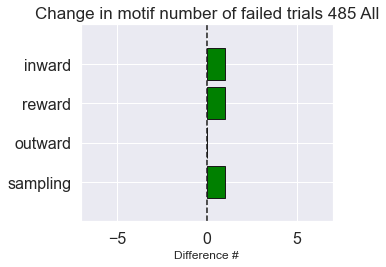

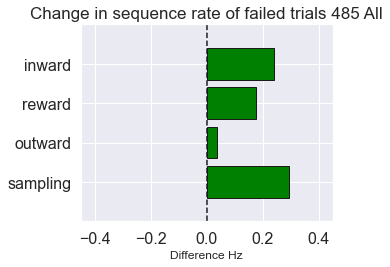

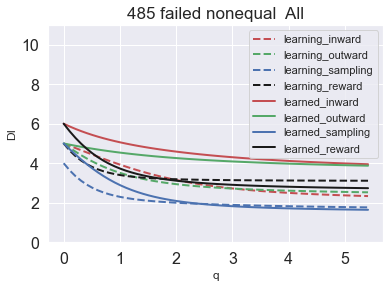

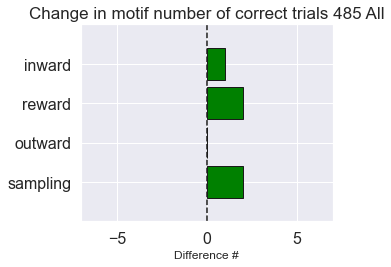

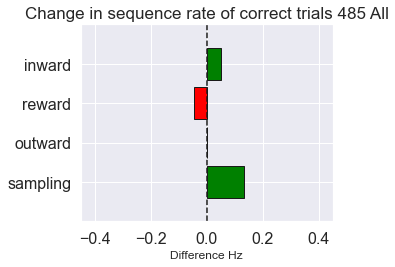

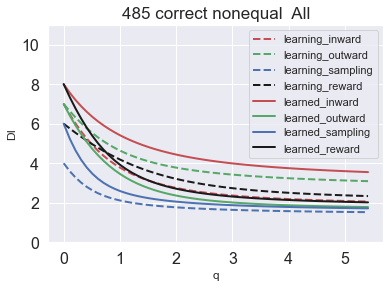

In [ ]:

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16  # You can adjust the font size as needed
plt.rcParams['ytick.labelsize'] = 16  # You can adjust the font size as needed

cond_results={'fr':{},'motif_nbr':{},'cluster_dist':{},'firingrates':{}}
equal_tial=False
odd_even=None
equality='nonequal'
if equal_tial==True:
    equality='equal'

#trial_type=1# 1 is correct       0 is failed

entropy={'correct':{},'failed':{}}




for trial_type in range(2):
    fr_trial={}
    
    sessin_numbers=np.arange(len(session_mask))



    phase=0 # learning
    if trial_type==1:
        typename='correct'
    elif trial_type==0:
        typename='failed'

    for cond_number_name in cond_numbers.keys():
        cond_number_= cond_numbers[cond_number_name]
        run_data_all_cond=mot.apply_masks_test(sess_info,Masks,cond_number_,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
        cond_results['firingrates'][cond_number_name+'learning'+typename]=run_data_all_cond['fr']

        #cond_results['fr']['learning_'+cond_number_name]=np.mean(fs*run_data_all_cond['fr'])
        cond_results['fr']['learning_'+cond_number_name]= fs*len(run_data_all_cond['seqs'])/len(run_data_all_cond['poprate'])

        cond_results['motif_nbr']['learning_'+cond_number_name]=len(np.unique(run_data_all_cond['ids_clust']))

        id_clusters = run_data_all_cond['ids_clust']
        labels, counts = np.unique(id_clusters, return_counts=True)
        cond_results['cluster_dist']['learning_'+cond_number_name] = {'seq_len':len(id_clusters),'cluster_number': labels, 'clsuster_counts':counts}


        fr_trial['learning_'+cond_number_name]=np.mean(fs*(run_data_all_cond['fr']))
        #print(cond_number_name,len(run_data_all_cond['poprate']))
        print('ing',cond_number_name,equality,len(np.unique(run_data_all_cond['ids_clust'])))


    phase=1 # learned
    #cond_info={}
    for cond_number_name in cond_numbers.keys():
        cond_number_= cond_numbers[cond_number_name]
        run_data_all_cond=mot.apply_masks_test(sess_info,Masks,cond_number_,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
        cond_results['firingrates'][cond_number_name+'learned'+typename]=run_data_all_cond['fr']

        #cond_results['fr']['learned_'+cond_number_name]=np.mean(fs*run_data_all_cond['fr'])
        cond_results['fr']['learned_'+cond_number_name]= fs*len(run_data_all_cond['seqs'])/len(run_data_all_cond['poprate'])

        cond_results['motif_nbr']['learned_'+cond_number_name]=len(np.unique(run_data_all_cond['ids_clust']))

        id_clusters = run_data_all_cond['ids_clust']
        labels, counts = np.unique(id_clusters, return_counts=True)
        cond_results['cluster_dist']['learned_'+cond_number_name] = {'seq_len':len(id_clusters),'cluster_number': labels, 'clsuster_counts':counts}

        #print(cond_number_name,len(run_data_all_cond['poprate']))
        print('ed',cond_number_name,equality,len(np.unique(run_data_all_cond['ids_clust'])))
        fr_trial['learned_'+cond_number_name]=np.mean(fs*(run_data_all_cond['fr']))






    plt.rcParams.update({'font.size': 16})
    plt.rcParams['axes.titlesize'] = 17  # Set the title font size
    motif_diffs = mot.find_diffs(cond_results['motif_nbr'],pairs)
    mot.diff_bar_plot(motif_diffs,'Change in motif number of '+typename+' trials '+ fol+' '+cell_types)

    plt.savefig(savefolder+'motifnumber'+fol+'.png')

    #motif_diffs = mot.find_diffs(cond_results['fr'],pairs)
    motif_diffs = mot.find_diffs(fr_trial,pairs)



    mot.diff_bar_plot(motif_diffs,'Change in sequence rate of '+typename+' trials ' + fol+' '+cell_types)
    plt.savefig(savefolder+'firingrate'+fol+'.png')








    # compute diversity index for different qs
    Div_idxq={}

    for epochs in cond_results['cluster_dist'].keys():
        data=cond_results['cluster_dist'][epochs]
        diq=[]
        xq=np.arange(0.011,5.51,.1)
        xq[0]=0
        for q in (xq):
            
            diq.append( mot.calculate_diversity_q(data,q))
        
        Div_idxq[epochs]=diq
        entropy[typename][epochs]=Div_idxq[epochs][1]

    mot.plot_diversity_index(Div_idxq,fol+' '+typename+' '+equality+' '+place_cell_name+' '+cell_types,xq)

    plt.savefig(savefolder+fol+'DI'+type_name+' '+place_cell_name+' '+cell_types+descriotor+'.png')


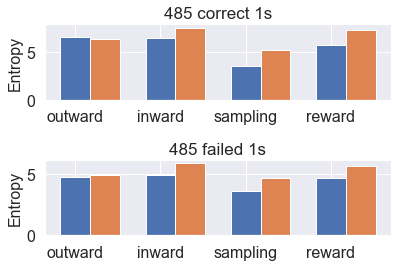

In [ ]:
nmeoftrial=['correct','failed']
fig,ax=plt.subplots(2,1,)


for ix, namtrl in enumerate(nmeoftrial):

    data1=entropy[namtrl]

    learning_values = [data1[key] for key in data1 if 'learning' in key]
    learned_values = [data1[key] for key in data1 if 'learned' in key]

    # Create labels for the conditions
    conditions = [key.split('_')[1] for key in data1 if 'learning' in key]

    # Plotting the bar graph
    width = 0.35
    bar1 = ax[ix].bar(conditions, learning_values, width, label='Learning')
    bar2 = ax[ix].bar([i + width for i in range(len(conditions))], learned_values, width, label='Learned')

    # Adding labels, title, and legend
    ax[ix].set_ylabel('Entropy',fontsize=16)
    ax[ix].set_title(fol+' '+namtrl+' '+burst_len)
    if ix==10:
        ax[ix].legend()

# Show the plot
plt.tight_layout()
plt.show()

with open(savefolder+fol+'Entropy'+'_'+place_cell_name+' '+cell_types+descriotor,'wb') as f:
    pickle.dump(entropy, f) 

In [ ]:
fol+'Entropy'+'_'+place_cell_name

'485Entropy_'

In [ ]:
descriotor

'all_days_original_bursts_neworder1s_transientsaranaandsleep'

In [ ]:
descriotor

'all_days_original_bursts_neworder1s_transientsaranaandsleep'

In [ ]:
# descriotor='all_days_original_bursts_neworder1s_transients'
# burst_len='1s'

In [ ]:
# allfolders2=['478', '481', '483', '485']
# #allfolders2=['478',  '483', '485']

# entropies={}
# for fl in allfolders2:
#     entropies[fl]=np.load(savefolder+fl+'Entropy'+'_'+place_cell_name+' '+cell_types+descriotor,allow_pickle=True)

In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Preparing data for statistical tests and visualization
# plot_data = {animal_id: {'learning': [], 'learned': []} for animal_id in animal_ids}

# for animal_id, animal_data in entropies.items():
#     for data_type in ['correct', 'failed']:
#         for key, value in animal_data[data_type].items():
#             if 'learning' in key:
#                 plot_data[animal_id]['learning'].append(value)
#             else:
#                 plot_data[animal_id]['learned'].append(value)

# # Performing statistical tests and plotting
# fig, axes = plt.subplots(2, 2, figsize=(6, 4))
# p_values_results = {}

# for i, (animal_id, data_) in enumerate(plot_data.items()):
#     ax = axes[i // 2, i % 2]
    
#     # Mann-Whitney U test
#     stat, p_value = wilcoxon(data_['learning'], data_['learned'])
#     p_values_results[animal_id] = p_value
    
#     # Plotting data
#     ax.boxplot([data_['learning'], data_['learned']])
#     ax.set_title(f'Animal {animal_id} (p-value: {p_value:.2f})',fontsize=12)
#     ax.set_xticklabels(['Learning', 'Learned'])
    
#     # Indicate statistical significance
#     if p_value < 0.05:
#         ax.text(1.5, max(max(data_['learning']), max(data_['learned'])), 'Significant', ha='center', va='bottom', color='red')

# fig.suptitle('Entropies '+burst_len)
# plt.tight_layout()
# plt.show()

# # Output p-values
# p_values_results


In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Preparing data for statistical tests and visualization for each key
# keys = ['inward', 'outward', 'sampling', 'reward']
# p_values_results = {}

# fig, axes = plt.subplots(2, 2, figsize=(6, 4))

# for i, key in enumerate(keys):
#     learning_values = []
#     learned_values = []

#     # Extracting and merging data for each key
#     for animal_data in entropies.values():
#         for data_type in ['correct', 'failed']:
#             for subkey, value in animal_data[data_type].items():
#                 if key in subkey:
#                     if 'learning' in subkey:
#                         learning_values.append(value)
#                     else:
#                         learned_values.append(value)

#     # Mann-Whitney U test
#     stat, p_value = wilcoxon(learning_values, learned_values)
#     p_values_results[key] = p_value
#     ax = axes[i // 2, i % 2]
#     # Plotting
#     #ax = axes[i]
#     ax.boxplot([learning_values, learned_values])
#     ax.set_title(f'{key.capitalize()} (p-value: {p_value:.2f})',fontsize=12)
#     ax.set_xticklabels(['Learning', 'Learned'])

#     # Indicate statistical significance
#     if p_value < 0.05:
#         ax.text(1.5, max(max(learning_values), max(learned_values)), 'Significant', ha='center', va='bottom', color='red')

# fig.suptitle('Entropies animals merged '+burst_len)
# plt.tight_layout()
# plt.show()

# # Output p-values
# p_values_results


In [ ]:
a

array([166326.        , 166326.00052826, 166326.00105652, 166326.00158479,
       166326.00211305])

In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Preparing data for statistical tests and visualization for each key
# keys = ['inward', 'outward', 'sampling', 'reward']

# p_values_results = {'correct':{},'failed':{}}
# all_data_type={}
# for data_type in ['correct', 'failed']:
#     fig, axes = plt.subplots(2, 2, figsize=(6, 4))
#     for i, key in enumerate(keys):
#         learning_values = []
#         learned_values = []

#     # Extracting and merging data for each key
#         for animal_data in entropies.values():
#             for subkey, value in animal_data[data_type].items():
#                 if key in subkey:
#                     if 'learning' in subkey:
#                         learning_values.append(value)
#                     else:
#                         learned_values.append(value)
#         all_data_type[data_type+key+'learning']=learning_values
#         all_data_type[data_type+key+'learned']=learned_values

#         # Mann-Whitney U test
#         stat, p_value = wilcoxon(learning_values, learned_values)
#         p_values_results[data_type][key] = p_value
#         ax = axes[i // 2, i % 2]
#         # Plotting
#         #ax = axes[i]
#         ax.boxplot([learning_values, learned_values])
#         ax.set_title(f'{key.capitalize()} (p-value: {p_value:.2f})',fontsize=12)
#         ax.set_xticklabels(['Learning', 'Learned'])

#         # Indicate statistical significance
#         if p_value < 0.05:
#             ax.text(1.5, max(max(learning_values), max(learned_values)), 'Significant', ha='center', va='bottom', color='red')

#     fig.suptitle('Entropies animals merged '+data_type+' '+burst_len)
#     plt.tight_layout()
#     plt.show()

# # Output p-values
# p_values_results

In [ ]:
# import matplotlib.pyplot as plt

# # Merging data of all animals for each key in 'correct' and 'failed' categories
# keys = ['inward', 'outward', 'sampling', 'reward']
# merged_data = {
#     'correct': {key: {'learning': [], 'learned': []} for key in keys},
#     'failed': {key: {'learning': [], 'learned': []} for key in keys}
# }

# # Extracting and merging values for each key, label type, and learning/learned category
# for animal_data in entropies.values():
#     for label_type in ['correct', 'failed']:
#         for key in keys:
#             for subkey, value in animal_data[label_type].items():
#                 if key in subkey:
#                     category = 'learning' if 'learning' in subkey else 'learned'
#                     merged_data[label_type][key][category].append(value)

# # Creating boxplots for merged data
# fig, axes = plt.subplots(nrows=2, ncols=len(keys), figsize=(12, 8))

# for i, label_type in enumerate(['correct', 'failed']):
#     for j, key in enumerate(keys):
#         ax = axes[i][j]
#         ax.boxplot([merged_data[label_type][key]['learning'], merged_data[label_type][key]['learned']])
#         ax.set_title(f'{key.capitalize()} - {label_type.capitalize()}')
#         ax.set_xticklabels(['Learning', 'Learned'])

# # Adjusting layout and titles
# fig.suptitle('Comparison of Learning and Learned for Each Key (Merged Data from All Animals)')
# plt.tight_layout()
# plt.show()


In [ ]:
# from scipy.stats import mannwhitneyu

# # Keys and label types
# keys = ['inward', 'outward', 'sampling', 'reward']
# label_types = ['correct', 'failed']

# # Initializing a dictionary to store p-values
# p_values_stats_individual = {animal_id: {label_type: {} for label_type in label_types} for animal_id in entropies}

# # Performing statistical tests for each animal, key, and label type
# for animal_id, animal_data in entropies.items():
#     for label_type in label_types:
#         for key in keys:
#             # Extracting 'learning' and 'learned' values for the specific key and label type
#             learning_values = [value for subkey, value in animal_data[label_type].items() if key in subkey and 'learning' in subkey]
#             learned_values = [value for subkey, value in animal_data[label_type].items() if key in subkey and 'learned' in subkey]

#             # Mann-Whitney U test
#             if learning_values and learned_values:  # Check if lists are not empty
#                 stat, p_value = mannwhitneyu(learning_values, learned_values)
#                 p_values_stats_individual[animal_id][label_type][key] = p_value

# # Outputting the p-values
# p_values_stats_individual


In [ ]:
# import matplotlib.pyplot as plt

# # Preparing data for boxplot visualization
# label_types = ['correct', 'failed']
# keys = ['outward', 'inward', 'sampling', 'reward']

# # Creating subplots for each label type and key
# fig, axes = plt.subplots(nrows=len(label_types), ncols=len(keys), figsize=(20, 10))

# for row, label_type in enumerate(label_types):
#     for col, key in enumerate(keys):
#         # Extracting values for each animal and key
#         values = []
#         for animal_id in entropies:
#             animal_values = [val for subkey, val in entropies[animal_id][label_type].items() if key in subkey]
#             values.append(animal_values)

#         # Boxplot for each key and label type
#         ax = axes[row][col]
#         ax.boxplot(values)
#         ax.set_title(f'{label_type.capitalize()} - {key.capitalize()}')
#         ax.set_xticklabels(entropies.keys(), rotation=45)

# # Adjusting layout and titles
# fig.suptitle('Box Plot for Correct and Failed Categories Across All Animals')
# plt.tight_layout()
# plt.show()


In [ ]:
# # Pool data for correct and failed trials
# from scipy.stats import mannwhitneyu
# from scipy.stats import wilcoxon
# pooled_data = {'correct': {}, 'failed': {}}
# from scipy.stats import ttest_rel
# for animal, trials in entropies.items():
#     for trial_type in ['correct', 'failed']:
#         for condition in ['inward', 'outward', 'sampling', 'reward']:
#             learning_key = f'learning_{condition}'
#             learned_key = f'learned_{condition}'

#             if condition not in pooled_data[trial_type]:
#                 pooled_data[trial_type][condition] = {'learning': [], 'learned': []}

#             pooled_data[trial_type][condition]['learning'].append(trials[trial_type][learning_key])
#             pooled_data[trial_type][condition]['learned'].append(trials[trial_type][learned_key])

# # Perform paired t-tests for each condition separately for correct and failed trials
# statistics_entropy={'correct':{},'failed':{}}

# for trial_type in ['correct', 'failed']:
#     for condition in ['inward', 'outward', 'sampling', 'reward']:
#         learning_values = np.array(pooled_data[trial_type][condition]['learning'])
#         learned_values = np.array(pooled_data[trial_type][condition]['learned'])

#         # Perform the t-test
#         t_stat, p_value = wilcoxon(learning_values, learned_values)
#         statistics_entropy[trial_type][condition]=[p_value]
#         # Print the results
#         print(f"Trial Type: {trial_type}, Condition: {condition}")
#         print(f"T-statistic: {t_stat}, P-value: {p_value}")
#         print("-----------------------------------------")



# # Merging data
# merged_correct_learning = []
# merged_correct_learned = []
# merged_failed_learning = []
# merged_failed_learned = []

# for animal_data in entropies.values():
#     for key, value in animal_data['correct'].items():
#         if 'learning' in key:
#             merged_correct_learning.append(value)
#         else:
#             merged_correct_learned.append(value)
#     for key, value in animal_data['failed'].items():
#         if 'learning' in key:
#             merged_failed_learning.append(value)
#         else:
#             merged_failed_learned.append(value)

# # Performing statistical tests
# correct_stat, correct_p_value = wilcoxon(merged_correct_learning, merged_correct_learned)
# failed_stat, failed_p_value = wilcoxon(merged_failed_learning, merged_failed_learned)

# statistics_entropy['failed']['all']=[failed_p_value]
# statistics_entropy['correct']['all']=[correct_p_value]

In [ ]:
# import matplotlib.pyplot as plt



# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 2))

# # Plot for correct trials
# axes.plot(statistics_entropy['correct'].keys(), [value[0] for value in statistics_entropy['correct'].values()], color='green',label='corret',linewidth=4)
# axes.set_title('Learning vs Learned Entropy '+burst_len,fontsize=20)
# axes.set_ylabel('P-values')

# # Plot for failed trials
# axes.plot(statistics_entropy['failed'].keys(), [value[0] for value in statistics_entropy['failed'].values()], color='red',label='failed',linewidth=4)
# axes.hlines(.05,-1,5,color='black',linestyle='dashed')
# axes.set_xlim([-.5,3.5])

# axes.hlines(.05,-1,5,color='black',linestyle='dashed')
# axes.set_xlim([-.5,4.5])
# axes.set_ylim([0,1.1])
# axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
# import matplotlib.pyplot as plt



# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

# # Plot for correct trials
# axes[0].bar(statistics_entropy['correct'].keys(), [value[0] for value in statistics_entropy['correct'].values()], color='green')
# axes[0].set_title('Correct Trials pval '+burst_len,fontsize=20)
# #axes[0].set_ylabel('Values')

# # Plot for failed trials
# axes[1].bar(statistics_entropy['failed'].keys(), [value[0] for value in statistics_entropy['failed'].values()], color='red')
# axes[1].set_title('Failed Trials pval '+burst_len,fontsize=20)
# axes[1].hlines(.05,-1,5,color='black',linestyle='dashed')
# axes[1].set_xlim([-.5,3.5])

# axes[0].hlines(.05,-1,5,color='black',linestyle='dashed')
# axes[0].set_xlim([-.5,3.5])
# axes[0].set_ylim([0,1])

# #axes[1].set_ylabel('Values')

# plt.tight_layout()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Merging all data from all animals for 'failed' and 'correct' categories
# merged_data = {
#     'failed': {'learning': [], 'learned': []},
#     'correct': {'learning': [], 'learned': []}
# }

# for animal_data in entropies.values():
#     for label_type in ['failed', 'correct']:
#         for key in keys:
#             for subkey, value in animal_data[label_type].items():
#                 if key in subkey:
#                     category = 'learning' if 'learning' in subkey else 'learned'
#                     merged_data[label_type][category].append(value)

# # Performing statistical tests and plotting
# fig, axes = plt.subplots(1, 2, figsize=(6, 4))
# p_values_merged = {'failed': {}, 'correct': {}}

# for i, label_type in enumerate(['failed', 'correct']):
#     ax = axes[i]

#     # Mann-Whitney U test
#     learning_data = merged_data[label_type]['learning']
#     learned_data = merged_data[label_type]['learned']
#     stat, p_value = mannwhitneyu(learning_data, learned_data)
#     p_values_merged[label_type] = p_value

#     # Boxplot
#     ax.boxplot([learning_data, learned_data])
#     ax.set_title(f'{label_type.capitalize()} (p-value: {p_value:.2f}) ')
#     ax.set_xticklabels(['Learning', 'Learned'])

# # Adjusting layout and titles
# plt.suptitle('Merged Data '+burst_len)
# plt.tight_layout()
# plt.show()

# # Outputting p-values
# p_values_merged


In [ ]:
cond_results_allsess_all={'learned':{},'learning':{},'both':{}}
odd_even=None
phase=None# both
#phase=0# learned
#phase=0# learning

if phase==1:
    phasename='learned'

elif phase==0:
    phasename='learning'

elif phase==None:
    phasename='both'

#trial_type=1# 1 is correct       0 is failed

for ises, nameofsess in enumerate(session_mask.keys()):
    cond_results={'fr':{},'motif_nbr':{},'cluster_dist':{},'firingrates':{}}

    for trial_type in range(2):

        sessin_numbers=[ises]#[0]#np.arange(len(session_mask))
        if trial_type==1:
            typename='correct'
        elif trial_type==0:
            typename='failed'


        for cond_number_name in cond_numbers.keys():
            cond_number_= cond_numbers[cond_number_name]
            run_data_all_cond=mot.apply_masks_test(sess_info,Masks,cond_number_,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
            cond_results['firingrates'][cond_number_name+typename]=run_data_all_cond['fr']

            if len(run_data_all_cond['poprate'])>0:
                cond_results['fr'][cond_number_name+typename]= fs*len(run_data_all_cond['seqs'])/len(run_data_all_cond['poprate'])


            cond_results['motif_nbr'][cond_number_name+typename]=len(np.unique(run_data_all_cond['ids_clust']))

            id_clusters = run_data_all_cond['ids_clust']
            labels, counts = np.unique(id_clusters, return_counts=True)
            cond_results['cluster_dist'][cond_number_name+typename] = {'seq_len':len(id_clusters),'cluster_number': labels, 'clsuster_counts':counts}
            
        cond_results_allsess_all[phasename][nameofsess] = cond_results

with open(savefolder+fol+'fr'+'_'+place_cell_name+' '+cell_types+phasename+descriotor,'wb') as f:
    pickle.dump(cond_results_allsess, f) 

c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_data['seqs']=np.asarray(sess_info['seqs'])[mask_sess_burst & mask_cond_burst & mask_odd_seqs & mask_correct_seqs & mask_phase_seqs & Masks['speed_seq']]


In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# # analys correct trials on learned or learning data using firing rates
# seq_rate_len={}
# pval_all_sess={}

# pval_all_sees={ 'inward':{},'sampling':{},'outward':{}}
# shufflenumber=100
# samplingnumber=100


# for cod in pval_all_sees.keys():
#     pval_real_data={ 'inward':{},'sampling':{},'outward':{}}
#     fr_len= {'correct':[],'failed':[]}
#     fr= {'correct':[],'failed':[]}
#     for sessname in cond_results_allsess_all[phasename].keys():
        
#         if ('arena' in sessname) | ('sleep' in sessname):# exclude sleep and arena data
#             continue
        
#         performanc=dict(correctrate)[sessname]
        
#         cond_results = cond_results_allsess_all[phasename][sessname]
#         #conds=['sampling','inward','outward','reward']

#         if len([x for x in cond_results['firingrates'].keys() if cod in x])<1:
#             continue

#         fr_correcnt= cond_results['firingrates'][cod+'correct']
#         fr_failed= cond_results['firingrates'][cod+'failed']    

#         if len(fr_correcnt)<trial_thr or len(fr_failed)<trial_thr :# exclude session with very small trial number
#             pval_real_data[cod]['pval'] =[]
#             pval_real_data[cod]['mean_ccr'] =[]
#             continue

#         fr_len['correct']=len(fr_correcnt) 
#         fr_len['failed']=len(fr_failed) 

#         fr['correct'].extend(fr_correcnt)
#         fr['failed'].extend(fr_failed)

#         label_correct=1+np.zeros(len(fr['correct'])).astype(int)
#         label_failed=np.zeros(len(fr['failed'])).astype(int)

#         labels=np.concatenate((label_correct,label_failed))
#         seqrates=np.concatenate((fr['correct'],fr['failed'])).reshape(-1, 1)


#     print(sessname)
#     rndmidx=np.arange(len(labels))
#     random.shuffle(rndmidx)

#     seqrates_rnd=seqrates[rndmidx]
#     labels_rnd=labels[rndmidx]
#     #LDA_seqrate(seqrates_rnd,labels_rnd,cod)

#     x_dt=seqrates_rnd
#     y_lb=labels_rnd
#     # if len(np.unique(y_lb))<2:
#     #     continue  
#     Ccrs=mot.train_test_model(x_dt,y_lb,subsamplings=samplingnumber)
#     ccr_mean=np.mean(Ccrs)
#     ccr_std=np.std(Ccrs)

#     y_sh=np.copy(y_lb)

#     sh_dist=[]
#     for sh in range(shufflenumber):
#         random.shuffle(y_sh)
#         if np.sum(np.asarray(x_dt)[np.asarray(y_sh==0)])==0:
#             continue
        
#         Ccrs_sh=mot.train_test_model(x_dt,y_sh,subsamplings=samplingnumber)
#         sh_dist.append(np.mean(Ccrs_sh))
#     if 1:
#         plt.figure()
#         plt.hist(sh_dist,alpha=.4)
#         #
#         plt.hist(Ccrs,alpha=.4)
#         plt.vlines(ccr_mean,0,shufflenumber,color='red',linestyle='dashed')
        
#         plt.title(cod+sessname)
#     pval=1-np.sum(ccr_mean>sh_dist)/len(sh_dist)
#     pval_all_sees[cod]['pval'] = round(pval, 2)
#     pval_all_sees[cod]['mean_ccr'] =round(ccr_mean, 2)
#     pval_all_sees[cod]['ccr_std'] =round(ccr_std, 2)

#     pval_all_sees

# pval_and_fr = [pval_all_sess, cond_results_allsess ]
# with open(savefolder+fol+'pvalues'+ '_'+place_cell_name+'_'+cell_types+'_'+descriotor,'wb') as f:
#     pickle.dump(pval_and_fr, f) 

In [ ]:
mean_ccr_values

NameError: name 'mean_ccr_values' is not defined

In [ ]:
pval_all_sees

{'inward': {}, 'sampling': {}, 'outward': {}}

In [ ]:
# import matplotlib.pyplot as plt

# trend_colors = colors = plt.cm.Set1(range(4))
# plt.rcParams.update({'font.size': 16})
# plt.rcParams['axes.titlesize'] = 17  # Set the title font size
# plt.rcParams['xtick.labelsize'] = 16  # You can adjust the font size as needed
# plt.rcParams['ytick.labelsize'] = 16  # You can adjust the font size as needed
# plt.rcParams.update({'font.size': 16})

# categories = list(pval_all_sees.keys())
# mean_ccr_values = [entry['mean_ccr'] for entry in pval_all_sees.values()]
# pval_values = [entry['pval'] for entry in pval_all_sees.values()]

# # Create a bar plot
# fig, ax = plt.subplots(figsize=(4,3))
# #bars = ax.bar(categories, mean_ccr_values, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')
# bars = ax.bar(categories, mean_ccr_values, color=trend_colors, edgecolor='black')

# # Add labels and title
# ax.set_ylabel('Mean CCR',fontsize=14)
# ax.set_title(fol+' Pooled '+phasename+' '+cell_types+' '+burst_len,fontsize=16)
# ax.hlines(.5,-1,4)

# # Add asterisks for p-values less than 0.05
# for bar, pval in zip(bars, pval_values):
#     if pval < 0.05:
#         height = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, '*', ha='center', va='bottom', color='red', fontsize=52)
# ax.set_ylim([0,1])
# ax.set_xlim([-.5,2.5])
# plt.savefig(savefolder+'ccr_pooled_per_animal_'+fol+' '+cell_types+descriotor+'.png')
# plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# analys correct trials on learned or learning data using firing rates
seq_rate_len={}
pval_all_sess={}
for sessname in cond_results_allsess_all[phasename].keys():
    if ('arena' in sessname) | ('sleep' in sessname):# exclude sleep and arena data
        continue
    performanc=dict(correctrate)[sessname]
    
    cond_results = cond_results_allsess_all[phasename][sessname]
    pval_real_data={ 'inward':{},'sampling':{},'outward':{}}
    fr_len= {'correct':[],'failed':[]}
    #conds=['sampling','inward','outward','reward']


    shufflenumber=100
    samplingnumber=100
    for cod in pval_real_data.keys():

        
        if len([x for x in cond_results['firingrates'].keys() if cod in x])<1:

            continue

        fr_correcnt= cond_results['firingrates'][cod+'correct']
        fr_failed= cond_results['firingrates'][cod+'failed']    

        if len(fr_correcnt)<trial_thr or len(fr_failed)<trial_thr :# exclude session with very small trial number


            pval_real_data[cod]['pval'] =[]
            pval_real_data[cod]['mean_ccr'] =[]
            continue

        fr_len['correct']=len(fr_correcnt) 
        fr_len['failed']=len(fr_failed) 

        # Determine which class is the minority class
        if fr_correcnt.shape[0] < fr_failed.shape[0]:
            minority_class, majority_class = fr_correcnt, fr_failed
        else:
            minority_class, majority_class = fr_failed, fr_correcnt


        minority_size = minority_class.shape[0]
        majority_size = majority_class.shape[0]


        oversampling_ratio = majority_size // minority_size


        # Repeat the minority class samples
        oversampled_minority_class = np.repeat(minority_class, oversampling_ratio, axis=0)



        label_learning=1+np.zeros(len(majority_class)).astype(int)
        label_learned=np.zeros(len(oversampled_minority_class)).astype(int)

        labels=np.concatenate((label_learning,label_learned))
        seqrates=np.concatenate((majority_class,oversampled_minority_class)).reshape(-1, 1)
        # Combine the oversampled minority class with the majority class
        #balanced_dataset = np.vstack((majority_class, oversampled_minority_class))




        rndmidx=np.arange(len(labels))
        random.shuffle(rndmidx)

        seqrates_rnd=seqrates[rndmidx]
        labels_rnd=labels[rndmidx]
        #LDA_seqrate(seqrates_rnd,labels_rnd,cod)

        x_dt=seqrates_rnd
        y_lb=labels_rnd
        if len(np.unique(y_lb))<2:
            continue  
        Ccrs=mot.train_test_model(x_dt,y_lb,subsamplings=samplingnumber)
        ccr_mean=np.mean(Ccrs)

        y_sh=np.copy(y_lb)
        
        sh_dist=[]
        for sh in range(shufflenumber):
            random.shuffle(y_sh)
            if np.sum(np.asarray(x_dt)[np.asarray(y_sh==0)])==0:
                continue
            
            Ccrs_sh=mot.train_test_model(x_dt,y_sh,subsamplings=samplingnumber)
            sh_dist.append(np.mean(Ccrs_sh))
        if 0:
            plt.figure()
            plt.hist(sh_dist,alpha=.4)
            #
            plt.hist(Ccrs,alpha=.4)
            plt.vlines(ccr_mean,0,shufflenumber,color='red',linestyle='dashed')
            plt.title(cod+sessname)
        pval=1-np.sum(ccr_mean>sh_dist)/len(sh_dist)
        pval_real_data[cod]['pval'] = round(pval, 2)
        pval_real_data[cod]['mean_ccr'] =round(ccr_mean, 2)
        pval_real_data[cod]['performance'] =performanc
    if len(fr_correcnt)>0 and len(fr_failed)>0 :
        
        pval_all_sess[sessname]=pval_real_data
        seq_rate_len[sessname]=fr_len

pval_and_fr = [pval_all_sess, cond_results_allsess_all[phasename] ]
with open(savefolder+fol+'pvalues'+ '_'+place_cell_name+'_'+cell_types+'_'+descriotor,'wb') as f:
    pickle.dump(pval_and_fr, f) 

In [ ]:
fol+'pvalues'+ '_'+place_cell_name+'_'+cell_types+'_'+descriotor

'478pvalues__All_all_days_original_bursts_neworder.5s_transientsaranaandsleep'

c:\Users\hamed\Desktop\Hamed\Github\TP7\code\mtools.py:3906: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


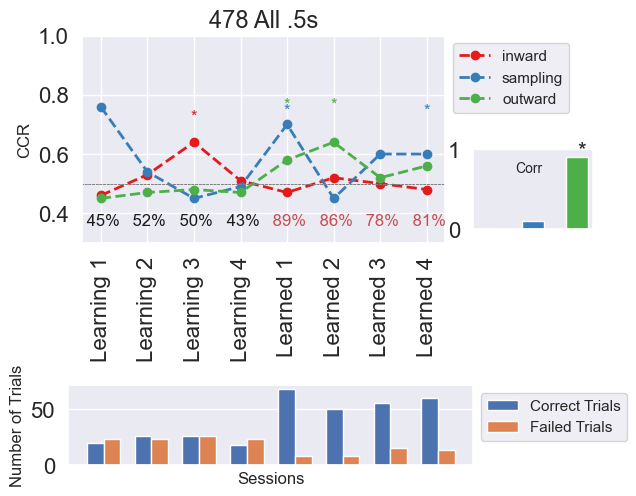

In [ ]:
# plot the ccr for all sessions
max_ccrs=np.nanmax([pval_all_sess[x][xx]['mean_ccr'] for x in pval_all_sess.keys() for xx in pval_real_data.keys()])
#max_ccrs=.9
p_value_threshold=.05
plt.figure(figsize=(6,4))

#trend_colors = ['royalblue', 'limegreen', 'c', 'darkviolet']
trend_colors = colors = plt.cm.Set1(range(4))

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 17  # Set the title font size

performance_vs_ccr={}

for icnd,cond in enumerate(pval_real_data.keys()):
    mean_ccr_corss_sess={}
    cnt1=0
    cnt2=0
    values=[]
    categories=[]
    perf_and_ccr=[]
    for ises,sesname in enumerate(pval_all_sess.keys()):
        ccrs=[pval_all_sess[x][cond]['mean_ccr'] for x in pval_all_sess.keys() ]

        performanc=dict(correctrate)[sesname]
        mccr=pval_all_sess[sesname][cond]['mean_ccr']
        pval=pval_all_sess[sesname][cond]['pval']

        if np.size(pval)<1:
            continue
        #plt.plot(sesname, mccr, marker='-', linestyle='-', color='r', label='Trend')    
        
        perf_and_ccr.append([performanc,mccr])



        values.append(mccr)
        if 'learning' in sesname:
            cnt1+=1
            catnames_='Learning '+str(cnt1)
        elif 'learned' in sesname:
            cnt2+=1
            catnames_='Learned '+str(cnt2)

        categories.append(catnames_)
        #categories.append(sesname)
        
        #plt.bar(sesname,mccr)
        plt.xticks(rotation=90)
        plt.title(fol+' '+cell_types+' '+burst_len)
        label = f'{pval:.2f}'
        if pval < p_value_threshold:
            label = '*'
           # plt.text(ises, max_ccrs+icnd/50, label, ha='center', va='bottom', fontsize=12,color=trend_colors[icnd])
            plt.text(ises, .7+icnd/50, label, ha='center', va='bottom', fontsize=12,color=trend_colors[icnd])

        if icnd==0:
            colorp='k'
            
            if performanc>=.7:
                colorp='r'

            p_value_percentage = performanc * 100
            perf = f' {p_value_percentage:.0f}%'
            plt.text(ises, .35, perf, ha='center', va='bottom', fontsize=12,color=colorp)
        plt.ylim([.3,1])
    plt.plot(categories, values, marker='o', linestyle='--', label=cond,color=trend_colors[icnd],linewidth=2)
    plt.ylabel('CCR')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))    
    plt.hlines(.5,-.5,ises+.5,linestyle='dashed',color='grey',linewidth=.5)
    plt.xlim((-.4,ises+.4))
    # Get the current axes
    ax = plt.gca()

    # Get the location information
    position = ax.get_position()

    performance_vs_ccr[cond]=np.asarray(perf_and_ccr)


performance_vs_ccr_correlation={}
from scipy.stats import pearsonr
for cnname in performance_vs_ccr.keys():
   performance_vs_ccr_correlation[cnname]=pearsonr(performance_vs_ccr[cnname][:,0], performance_vs_ccr[cnname][:,1])


ax_inset = plt.axes([.80, 0.39, 0.2, 0.2])  # [left, bottom, width, height]
for icnd,cond in enumerate(performance_vs_ccr_correlation.values()):
    ax_inset.bar(icnd, cond[0], width=0.5, color=trend_colors[icnd])
    if cond[1]<.05:
        ax_inset.text(icnd, cond[0], '*')


ax_inset.set_xticks([])
ax_inset.text(0.9, .71, 'Corr', fontsize=10, ha='center')

# #ax_inset.set_xticklabels(['Correlation'], fontsize=10)
ax_inset.set_ylim(0, 1)
# #ax_inset.set_title('Corr')
# title_text = "Title Inside Plot"
# ax_inset.text(0.9, .71, 'Corr', fontsize=10, ha='center')
# ax_inset.hlines(0, -.5, len(Corrs),color='grey',linestyle='-')
# ax_inset.set_xlim(-.5, len(Corrs)+.015)



ax_inset2 = plt.axes([position.x0, position.y0 -.31, position.x1 - position.x0-.1, 0.2])  # [left, bottom, width, height]

mot.plot_cluster_number(seq_rate_len,ax_inset2)


plt.savefig(savefolder+'ccr'+fol+' '+cell_types+descriotor+'.png')
plt.show(ax_inset2)



# Load the p-values and mean-ccr of of different animals and plot them

In [ ]:
# descriotor='all_days_original_bursts_neworder1s_transients'
# burst_len='1s'

In [ ]:
# allfolders2=['481','483','485','478']
# cumulative_data={'learning':{},'learned':{},'all':{}}
# fr_all={}
# learningtest=[]
# for fol1 in allfolders2:
#     allccrs,cond_results_allsess_loaded=np.load(savefolder+fol1+'pvalues'+'_'+place_cell_name+'_'+cell_types+'_'+descriotor,allow_pickle=True)
#     fr_all[fol1]=cond_results_allsess_loaded

#     for sesnam in allccrs.keys():
#         cumulative_data['all'] = concatenate_data(cumulative_data['all'], cond_results_allsess_loaded[sesnam]['fr'])
#         if 'learning' in sesnam:
#             cumulative_data['learning'] = concatenate_data(cumulative_data['learning'], cond_results_allsess_loaded[sesnam]['fr'])
#             learningtest.extend([x for keyname,x in cond_results_allsess_loaded[sesnam]['fr'].items() if 'failed' in keyname])


#         if 'learned' in sesnam:
#             cumulative_data['learned'] = concatenate_data(cumulative_data['learned'], cond_results_allsess_loaded[sesnam]['fr'])

# with open(savefolder+'cumulative_fr'+ '_'+place_cell_name+'_'+cell_types+'_'+descriotor+'.pkl','wb') as f:
#     pickle.dump(cumulative_data, f) 
#         #if 'learned' in sesnam:

# with open(savefolder+'fr_all_new2'+ '_'+place_cell_name+'_'+cell_types+'_'+descriotor+'.pkl','wb') as f:
#     pickle.dump(fr_all, f) 

In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Load your data
# # Replace this with your own code to load data
# # data = ...

# # Extract 'learning' and 'learned' data from the dictionary
# learning_data = cumulative_data['learning']
# learned_data = cumulative_data['learned']

# # Keys for comparison
# keys = ['outwardfailed', 'inwardfailed', 'samplingfailed', 'rewardfailed',
#         'outwardcorrect', 'inwardcorrect', 'samplingcorrect', 'rewardcorrect']

# # Function to perform Mann-Whitney U Test
# def perform_statistical_test(data1, data2):
#     stat, p_value = mannwhitneyu(data1, data2)
#     return p_value

# plt.figure(figsize=(12, 6))
# p_values = {}

# for i, key in enumerate(keys, 1):
#     plt.subplot(2, 4, i)
#     data_to_plot = [learning_data[key], learned_data[key]]
#     plt.boxplot(data_to_plot, notch=True)
#     plt.xticks([1, 2], ['Learning', 'Learned'])
#     plt.ylabel('Seq Rate')

#     # Perform statistical test
#     p_values[key] = perform_statistical_test(learning_data[key], learned_data[key])
#     #plt.title(key+str(p_values[key]))
#     plt.title(f'{key.capitalize()} (p-value: {p_values[key]:.2f}) ',fontsize=12)

# plt.suptitle(burst_len)
# plt.tight_layout()
# plt.show()

# # Print p-values
# print(p_values)


In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Load your data
# # Replace this with your actual data loading logic
# # learning_data = data['learning']
# # learned_data = data['learned']

# # Function to perform Mann-Whitney U Test
# def perform_statistical_test(data1, data2):
#     stat, p_value = mannwhitneyu(data1, data2)
#     return p_value

# # Keys for comparison
# keys = ['outwardfailed', 'inwardfailed', 'samplingfailed', 'rewardfailed',
#         'outwardcorrect', 'inwardcorrect', 'samplingcorrect', 'rewardcorrect']

# # Creating a figure for individual keys comparisons
# fig_keys, axes_keys = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid
# p_values_keys = {}

# for i, key in enumerate(keys):
#     if 'failed' in key:
#         correct_key = key.replace('failed', 'correct')

#         # Learning stage comparison (first row)
#         ax_learning = axes_keys[0, i % 4]
#         ax_learning.boxplot([learning_data[key], learning_data[correct_key]], notch=True)
#         p_value_learning = perform_statistical_test(learning_data[key], learning_data[correct_key])
#         p_values_keys[f'Learning {key}'] = p_value_learning
#         ax_learning.set_title(f'Learning: {key} \np={p_value_learning:.2f}')
#         ax_learning.set_xticks([1, 2])
#         ax_learning.set_xticklabels(['Failed', 'Correct'])
#         ax_learning.set_ylabel('Frequency Response')

#         # Learned stage comparison (second row)
#         ax_learned = axes_keys[1, i % 4]
#         ax_learned.boxplot([learned_data[key], learned_data[correct_key]], notch=True)
#         p_value_learned = perform_statistical_test(learned_data[key], learned_data[correct_key])
#         p_values_keys[f'Learned {key}'] = p_value_learned
#         ax_learned.set_title(f'Learned: {key} \np={p_value_learned:.2f}')
#         ax_learned.set_xticks([1, 2])
#         ax_learned.set_xticklabels(['Failed', 'Correct'])
#         ax_learned.set_ylabel('Frequency Response')
# plt.suptitle(burst_len)

# fig_keys.tight_layout()
# plt.show()

# # Print p-values for individual keys
# print("P-values for individual keys:", p_values_keys)


In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Load your data
# # Replace this with your actual data loading logic
# # learning_data = data['learning']
# # learned_data = data['learned']

# # Function to perform Mann-Whitney U Test
# def perform_statistical_test(data1, data2):
#     stat, p_value = mannwhitneyu(data1, data2)
#     return p_value

# # Keys for comparison
# keys = ['outwardfailed', 'inwardfailed', 'samplingfailed', 'rewardfailed',
#         'outwardcorrect', 'inwardcorrect', 'samplingcorrect', 'rewardcorrect']

# # Figure for individual keys comparisons
# fig_keys, axes_keys = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid
# p_values_keys = {}

# for i, key in enumerate(keys):
#     # if 'reward' in key:
#     #     continue
#     if 'failed' in key:
#         correct_key = key.replace('failed', 'correct')

#         # Learning stage comparison (first row)
#         ax_learning = axes_keys[0, i % 4]
#         ax_learning.boxplot([learning_data[key], learning_data[correct_key]], notch=True)
#         p_value_learning = perform_statistical_test(learning_data[key], learning_data[correct_key])
#         p_values_keys[f'Learning {key}'] = p_value_learning
#         ax_learning.set_title(f'Learning: {key} \np={p_value_learning:.2f}')
#         ax_learning.set_xticks([1, 2])
#         ax_learning.set_xticklabels(['Failed', 'Correct'])
#         ax_learning.set_ylabel('Seq Rate')

#         # Learned stage comparison (second row)
#         ax_learned = axes_keys[1, i % 4]
#         ax_learned.boxplot([learned_data[key], learned_data[correct_key]], notch=True)
#         p_value_learned = perform_statistical_test(learned_data[key], learned_data[correct_key])
#         p_values_keys[f'Learned {key}'] = p_value_learned
#         ax_learned.set_title(f'Learned: {key} \np={p_value_learned:.2f}')
#         ax_learned.set_xticks([1, 2])
#         ax_learned.set_xticklabels(['Failed', 'Correct'])
#         ax_learned.set_ylabel('Seq Rate')
# plt.suptitle(burst_len)

# fig_keys.tight_layout()

# plt.show()

# # Print p-values for individual keys
# print("P-values for individual keys:", p_values_keys)

# # Merging 'correct' and 'failed' data for learning and learned stages
# merged_failed_learning = [val for key, val in learning_data.items() if 'failed' in key for val in val if 'reward' not in key]
# merged_failed_learned = [val for key, val in learned_data.items() if 'failed' in key for val in val if 'reward' not in key]
# merged_correct_learning = [val for key, val in learning_data.items() if 'correct' in key for val in val if 'reward' not in key]
# merged_correct_learned = [val for key, val in learned_data.items() if 'correct' in key for val in val if 'reward' not in key]

# # Creating a figure for merged data comparisons
# fig_merged, axes_merged = plt.subplots(1, 2, figsize=(6, 3))  # 2x1 grid

# # Merged learning data comparison
# axes_merged[0].boxplot([merged_failed_learning, merged_correct_learning], notch=True)
# p_value_learning_merged = perform_statistical_test(merged_failed_learning, merged_correct_learning)
# axes_merged[0].set_title(f'Merged Learning: (p-value: {p_value_learning_merged:.2f})')
# axes_merged[0].set_xticks([1, 2])
# axes_merged[0].set_xticklabels(['Failed', 'Correct'])
# axes_merged[0].set_ylabel('Seq Rate')

# # Merged learned data comparison
# axes_merged[1].boxplot([merged_failed_learned, merged_correct_learned], notch=True)
# p_value_learned_merged = perform_statistical_test(merged_failed_learned, merged_correct_learned)
# axes_merged[1].set_title(f'Merged Learned: (p-value: {p_value_learned_merged:.2f})')
# axes_merged[1].set_xticks([1, 2])
# axes_merged[1].set_xticklabels(['Failed', 'Correct'])
# axes_merged[1].set_ylabel('Seq Rate')
# plt.suptitle(burst_len)

# fig_merged.tight_layout()

# plt.show()

# # Print p-values for merged data
# print("P-value for merged learning data:", p_value_learning_merged)
# print("P-value for merged learned data:", p_value_learned_merged)


In [ ]:
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu

# # Load your data
# # Replace this with your actual data loading logic
# # learning_data = data['learning']
# # learned_data = data['learned']

# # Function to perform Mann-Whitney U Test
# def perform_statistical_test(data1, data2):
#     stat, p_value = mannwhitneyu(data1, data2)
#     return p_value

# # Keys for comparison
# keys = ['outwardfailed', 'inwardfailed', 'samplingfailed', 'rewardfailed',
#         'outwardcorrect', 'inwardcorrect', 'samplingcorrect', 'rewardcorrect']

# # Plotting individual keys
# fig_keys, axes_keys = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid for individual keys
# p_values = {}
# for i, key in enumerate(keys):
    
#     ax = axes_keys[i // 4, i % 4]
#     data_to_plot = [learning_data[key], learned_data[key]]
#     ax.boxplot(data_to_plot, notch=True)
#     ax.set_xticks([1, 2])
#     ax.set_xticklabels(['Learning', 'Learned'])
#     ax.set_ylabel('Seq Rate')

#     # Perform statistical test
#     p_values[key] = perform_statistical_test(learning_data[key], learned_data[key])
#     #plt.title(key+str(p_values[key]))
#     ax.set_title(f'{key.capitalize()} (p-value: {p_values[key]:.2f})',fontsize=12)
# plt.suptitle(burst_len)


# fig_keys.tight_layout()

# plt.show()

# # Merge 'correct' and 'failed' data separately
# merged_failed_learning = [val for key, val in learning_data.items() if 'failed' in key for val in val if 'reward' not in key]
# merged_failed_learned = [val for key, val in learned_data.items() if 'failed' in key for val in val if 'reward' not in key]

# merged_correct_learning = [val for key, val in learning_data.items() if 'correct' in key for val in val if 'reward' not in key]
# merged_correct_learned = [val for key, val in learned_data.items() if 'correct' in key for val in val if 'reward' not in key]

# # Plotting merged 'failed' and 'correct' data in a separate figure
# fig_merged, axes_merged = plt.subplots(1, 2, figsize=(6, 3))  # 1x2 grid for merged data

# # Merged 'failed' data
# ax_failed = axes_merged[0]
# ax_failed.boxplot([merged_failed_learning, merged_failed_learned], notch=True)
# ax_failed.set_xticks([1, 2])
# ax_failed.set_xticklabels(['Learning', 'Learned'])
# ax_failed.set_ylabel('Seq rate')
# merged_failed_p_value = perform_statistical_test(merged_failed_learning, merged_failed_learned)
# ax_failed.set_title(f' Failed Merged (p-value: {merged_failed_p_value:.2f})')

# # Merged 'correct' data
# ax_correct = axes_merged[1]
# ax_correct.boxplot([merged_correct_learning, merged_correct_learned], notch=True)
# ax_correct.set_xticks([1, 2])
# ax_correct.set_xticklabels(['Learning', 'Learned'])
# ax_correct.set_ylabel('Seq rate')
# merged_correct_p_value = perform_statistical_test(merged_correct_learning, merged_correct_learned)
# ax_correct.set_title(f' Correct Merged (p-value: {merged_correct_p_value:.2f})')
# plt.suptitle(burst_len)

# fig_merged.tight_layout()
# plt.show()

# # Print p-values for individual keys and merged data
# print("P-values for individual keys:", p_values)
# print("P-value for merged 'failed' data:", merged_failed_p_value)
# print("P-value for merged 'correct' data:", merged_correct_p_value)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import mannwhitneyu

# def plot_comparison_correct_failed_merged(data, keys_to_analyze, subkeys):
#     """Plot and compare the distributions of 'correct' and 'failed' for each key across all subkeys, including merged data.
#        Returns a dictionary of p-values for each comparison."""
#     p_values = {}

#     # Initialize merged data structure
#     merged_data = {key: {'failed': [], 'correct': []} for key in keys_to_analyze}

#     # Merging data for each key
#     for key in keys_to_analyze:
#         for subkey in subkeys:
#             for label_type in ['failed', 'correct']:
#                 full_key = subkey + label_type
#                 if full_key in data[key]:
#                     merged_data[key][label_type].extend(data[key][full_key])

#     # Plotting for each key and merged data
#     for key in keys_to_analyze:
#         fig, axes = plt.subplots(nrows=1, ncols=len(subkeys) + 1, figsize=(12, 3))  # +1 for merged data
#         fig.suptitle(f"Distribution Comparison for '{key}' - Correct vs Failed")

#         # Plotting for each subkey
#         for col, subkey in enumerate(subkeys + ["merged"]):
#             ax = axes[col]

#             # Collecting data for 'failed' and 'correct'
#             if subkey == "merged":
#                 failed_data = merged_data[key]['failed']
#                 correct_data = merged_data[key]['correct']
#             else:
#                 failed_key = subkey + 'failed'
#                 correct_key = subkey + 'correct'
#                 failed_data = data[key][failed_key] if failed_key in data[key] else []
#                 correct_data = data[key][correct_key] if correct_key in data[key] else []

#             # Determine bin edges
#             all_data = failed_data + correct_data
#             bins = np.linspace(min(all_data), max(all_data), 21) if all_data else 20

#             # Plot histograms
#             ax.hist(failed_data, bins=bins, alpha=0.7, label='Failed')
#             ax.hist(correct_data, bins=bins, alpha=0.7, label='Correct')

#             # Perform Mann-Whitney U test
#             if failed_data and correct_data:
#                 stat, p_value = mannwhitneyu(failed_data, correct_data)
#                 p_values[(key, subkey)] = p_value
#                 ax.set_title(f"{key.capitalize()} - {subkey.capitalize()} ( {p_value:.2f})")
#             else:
#                 ax.set_title(f"{key.capitalize()} - {subkey.capitalize()}")

#             ax.legend()

#         plt.tight_layout()
#         plt.show()

#     return p_values

# # Running the function
# subkeys = ['outward', 'inward', 'sampling', 'reward']
# p_values = plot_comparison_correct_failed_merged(cumulative_data, ['learning', 'learned'], subkeys)

# # Outputting p-values


# p_values
# plt.savefig(savefolder+'fr_distiribution'+fol+' '+place_cell_name+' '+cell_types+descriotor+'.png')


In [ ]:
# import matplotlib.pyplot as plt

# # Provided p-values


# # Preparing data for plotting
# categories = ['outward', 'inward', 'sampling', 'reward', 'merged']
# learning_pvalues = [p_values[('learning', cat)] for cat in categories]
# learned_pvalues = [p_values[('learned', cat)] for cat in categories]

# # Creating the plot
# fig, ax = plt.subplots(figsize=(4, 2))
# x = range(len(categories))
# ax.plot(x, learning_pvalues, label='Learning', marker='o',linewidth=4)
# ax.plot(x, learned_pvalues, label='Learned', marker='o',linewidth=4)

# # Adding a horizontal dashed line at p-value = 0.05
# ax.axhline(y=0.05, color='r', linestyle='--')

# # Adding labels and title
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_ylabel("P-Values")
# ax.set_title("P-Values for Learning vs Learned "+burst_len)
# ax.legend()

# # Show plot
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import mannwhitneyu

# def plot_subkey_comparison_with_stats_and_merged(data, compare_keys, background_key, subkeys):
#     """Plot the distribution comparison of specified keys against a background key for given subkeys with statistical test,
#        including the merged data. Returns a dictionary of p-values for each comparison."""
#     p_values = {}
#     merged_data = {key: {'failed': [], 'correct': []} for key in compare_keys}

#     # Merging data for each key
#     for key in compare_keys:
#         for label_type in ['failed', 'correct']:
#             for subkey in subkeys:
#                 full_key = subkey + label_type
#                 if full_key in data[key]:
#                     merged_data[key][label_type].extend(data[key][full_key])

#     # Number of subkeys plus one for merged data
#     num_subkeys = len(subkeys) + 1
#     fig, axes = plt.subplots(nrows=num_subkeys, ncols=2, figsize=(8, 2 * num_subkeys))
#     fig.suptitle(f"Distribution Comparison by Subkeys with Statistical Test - {', '.join(compare_keys)} vs {background_key}")

#     for row, subkey in enumerate(subkeys + ["merged"]):
#         for col, label_type in enumerate(['failed', 'correct']):
#             ax = axes[row, col]

#             # Collecting and plotting data for the current subplot
#             compare_data = []
#             all_data = []

#             for compare_key in compare_keys:
#                 if subkey == "merged":
#                     current_data = merged_data[compare_key][label_type]
#                 else:
#                     current_data = data[compare_key].get(subkey + label_type, [])

#                 all_data.extend(current_data)
#                 compare_data.append(current_data)

#             # Define common bin edges
#             if all_data:
#                 bins = np.linspace(min(all_data), max(all_data), 21)  # 20 bins
#                 for i, compare_key in enumerate(compare_keys):
#                     ax.hist(compare_data[i], bins=bins, alpha=0.7, label=f"{compare_key} ({label_type})")

#             # Perform Mann-Whitney U test if both datasets are available
#             if all(len(d) for d in compare_data):
#                 stat, p_value = mannwhitneyu(*compare_data)
#                 p_values[(subkey, label_type)] = p_value
#                 ax.set_title(f"{subkey.capitalize()} - {label_type.capitalize()} Labels (p-value: {p_value:.3f})")
#             else:
#                 ax.set_title(f"{subkey.capitalize()} - {label_type.capitalize()} Labels")

#             ax.legend()

#     # Adjust layout
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#     plt.show()
#     return p_values

# # To run this function, you need to provide the 'data' dictionary and the 'subkeys' list.
# # Example: 
# subkeys = ['outward', 'inward', 'sampling', 'reward']
# p_values_learn_vs_learning= plot_subkey_comparison_with_stats_and_merged(cumulative_data, ['learning', 'learned'], 'all', subkeys)


In [ ]:
# import matplotlib.pyplot as plt

# # Provided p-values
# label1='failed'
# label2='correct'

# # Preparing data for plotting
# categories = ['outward', 'inward', 'sampling', 'reward', 'merged']
# learning_pvalues = [p_values_learn_vs_learning[(cat,label1)] for cat in categories]
# learned_pvalues = [p_values_learn_vs_learning[(cat,label2)] for cat in categories]

# # Creating the plot
# fig, ax = plt.subplots(figsize=(6, 3))
# x = range(len(categories))
# ax.plot(x, learning_pvalues, label=label1, marker='o',linewidth=4)
# ax.plot(x, learned_pvalues, label=label2, marker='o',linewidth=4)

# # Adding a horizontal dashed line at p-value = 0.05
# ax.axhline(y=0.05, color='r', linestyle='--')

# # Adding labels and title
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_ylabel("P-Values")
# ax.set_title("P-Values for failed vs correct "+ burst_len)
# ax.legend()

# # Show plot
# plt.show()

In [ ]:
    background_key='all'
    compare_keys= ['learning', 'learned']
    """Plot the distribution comparison of specified keys against a background key for given subkeys."""
    # Number of subkeys and figure size adjustment
    num_subkeys = len(subkeys)
    fig, axes = plt.subplots(nrows=num_subkeys, ncols=2, figsize=(15, 4 * num_subkeys))
    fig.suptitle(f"Distribution Comparison by Subkeys - {', '.join(compare_keys)} vs {background_key}")

    for row, subkey in enumerate(subkeys):
        for col, label_type in enumerate(['failed', 'correct']):
            ax = axes[row, col]

            # Plotting background ('all') data
            background_key_full = subkey + label_type
            if background_key_full in cumulative_data[background_key]:
                ax.hist(cumulative_data[background_key][background_key_full], bins=20, alpha=0.5, color='grey', label=f"{background_key_full} ({background_key})")

            # Plotting comparison ('learning' and 'learned') data
            for compare_key in compare_keys:
                compare_key_full = subkey + label_type
                if compare_key_full in cumulative_data[compare_key]:
                    ax.hist(cumulative_data[compare_key][compare_key_full], bins=20, alpha=0.7, label=f"{compare_key_full} ({compare_key})")

            ax.set_title(f"{subkey.capitalize()} - {label_type.capitalize()} Labels")
            ax.legend()

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


NameError: name 'subkeys' is not defined

In [ ]:
def concatenate_data(existing_data, new_data):
    for key in new_data:
        if key in existing_data:
            existing_data[key].append(new_data[key])
        else:
            existing_data[key] = [new_data[key]]
    return existing_data


In [ ]:
allfolders2=['481','483','485','478']
CCRs={'inward':{},'sampling':{},'outward':{}}
PRFs={'inward':{},'sampling':{},'outward':{}}

pval_animasls_cond={}

for cond in CCRs.keys():
    learning_ccrs=[]
    learned_ccrs=[]

    learning_prfs=[]
    learned_prfs=[]

    pval_animasls={}

    for fol1 in allfolders2:
        allccrs,cond_results_allsess_loaded=np.load(savefolder+fol1+'pvalues'+'_'+place_cell_name+'_'+cell_types+'_'+descriotor,allow_pickle=True)
        #for nn in allccrs.keys():
            #print(allccrs[nn]['sampling'])
        #print(fol1)
        an_ccr_ing=[]
        an_ccr_ed=[]

        for sesnam in allccrs.keys():
            if 'learning' in sesnam:
                if np.size(allccrs[sesnam][cond]['mean_ccr'])<1:
                    continue

                learning_ccrs.append(allccrs[sesnam][cond]['mean_ccr'])
                an_ccr_ing.append(allccrs[sesnam][cond]['mean_ccr'])
                learning_prfs.append(allccrs[sesnam][cond].get('performance'))



            if 'learned' in sesnam:
                if np.size(allccrs[sesnam][cond]['mean_ccr'])<1:
                    continue
                learned_ccrs.append(allccrs[sesnam][cond]['mean_ccr'])
                an_ccr_ed.append(allccrs[sesnam][cond]['mean_ccr'])

                learned_prfs.append(allccrs[sesnam][cond].get('performance'))


        an_ccr_ing=[x for x in an_ccr_ing if np.size(x)>0 ]
        an_ccr_ed=[x for x in an_ccr_ed if np.size(x)>0 ]

        t_stat_an, p_value_an = stats.mannwhitneyu(an_ccr_ing, an_ccr_ed)
        #t_stat_an, p_value_an = stats.wilcoxon(an_ccr_ing, an_ccr_ed)

        pval_animasls[fol1]=p_value_an
    pval_animasls_cond[cond]=pval_animasls


    learning_ccrs=[x for x in learning_ccrs if np.size(x)>0 ]
    learned_ccrs=[x for x in learned_ccrs if np.size(x)>0 ]

    print(cond,len(learned_ccrs))
    print(cond,len(learned_prfs))

    cleaned_array = np.asarray(learned_ccrs)[~np.isnan(np.asarray(learned_ccrs))]
    CCRs[cond]['learning']=learning_ccrs
    CCRs[cond]['learned']=learned_ccrs

    PRFs[cond]['learning']=learning_prfs
    PRFs[cond]['learned']=learned_prfs




with open(savefolder+'CCRs'+ '_'+place_cell_name+'_'+cell_types+'_'+descriotor,'wb') as f:
    pickle.dump(CCRs, f) 

In [ ]:
from scipy.stats import pearsonr

Correlation_all={}
for conname in CCRs.keys():

    ccrs= CCRs[conname]['learning'] +CCRs[conname]['learned']
    prfs= PRFs[conname]['learning'] +PRFs[conname]['learned']
       
    Correlation_all[conname]=pearsonr(prfs, ccrs)

#ax_inset = plt.axes([.80, 0.39, 0.2, 0.2])  # [left, bottom, width, height]


fig,ax_inset=plt.subplots(1,1,figsize=(5,4))
for icnd,cond in enumerate(Correlation_all.keys()):
    Correlation_all[cond]
    ax_inset.bar(cond, Correlation_all[cond][0],  color=trend_colors[icnd])
    if Correlation_all[cond][1]<.05:
        ax_inset.text(icnd, Correlation_all[cond][0], '*',fontsize=22)

ax_inset.set_title('Correaltion CCR vs Performance '+burst_len,fontsize=20)
ax_inset.set_ylim([0,1])
plt.grid()

In [ ]:
# Preparing data for plotting
categories = ['outward', 'inward', 'sampling', 'reward', 'merged']
learning_pvalues = [p_values[('learning', cat)] for cat in categories]
learned_pvalues = [p_values[('learned', cat)] for cat in categories]

# Creating the plot
fig, ax = plt.subplots(figsize=(6, 3))
x = range(len(categories))
ax.plot(x, learning_pvalues, label='Learning', marker='o',linewidth=4)
ax.plot(x, learned_pvalues, label='Learned', marker='o',linewidth=4)

# Adding a horizontal dashed line at p-value = 0.05
ax.axhline(y=0.05, color='r', linestyle='--')

# Adding labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel("P-Values")
ax.set_title("P-Values for Learning vs Learned "+burst_len)
ax.legend()

# Show plot
plt.show()

In [ ]:
trend_colors = colors = plt.cm.Set1(range(4))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Extracting data for plotting
conditions = list(pval_animasls_cond.keys())
animals = list(pval_animasls_cond['inward'].keys())

# Create a grouped bar graph
bar_width = 0.25
index = np.arange(len(animals))

fig, ax = plt.subplots(figsize=(4, 2))
#plt.figure(figsize=(4, 2))

for i, condition in enumerate(conditions):
    p_values = [pval_animasls_cond[condition][animal] for animal in animals]
    bar_position = index + i * bar_width
    #ax.bar(bar_position, p_values, bar_width, label=condition,color=trend_colors[i])
    #ax.plot(animals, p_values,  label=condition,color=trend_colors[i],linewidth=4)
    ax.plot(animals, p_values, marker='o', linestyle='-',color=trend_colors[i], label=category,linewidth=4)

# Add a horizontal dashed line at y = 0.05
ax.axhline(y=0.05, color='black', linestyle='--', label='Significance Level (0.05)')

ax.set_xlabel('Animals')
ax.set_ylabel('P-Values')
ax.set_title('Learned vs learning '+burst_len,fontsize=22)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(animals)
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Provided p-values
# p_values = {
#     'inward': {'481': 0.10985524288571236, '483': 0.38363032713198975, '485': 0.07142857142857142, '478': 0.6552321995577775},
#     'sampling': {'481': 0.6445521705158991, '483': 0.7701533183969194, '485': 0.03571428571428571, '478': 0.34285714285714286},
#     'outward': {'481': 0.26834058909588177, '483': 0.042066412206780826, '485': 0.39285714285714285, '478': 0.34285714285714286}
# }

# Extracting unique subkeys from the data
subkeys = list({k for cat_data in pval_animasls_cond.values() for k in cat_data.keys()})

# Plotting each category
i=0
plt.figure(figsize=(4, 2))
for category, values in pval_animasls_cond.items():
   
    p_vals = [values.get(subkey) for subkey in subkeys]
    plt.plot(subkeys, p_vals, marker='o', linestyle='-',color=trend_colors[i], label=category,linewidth=4)
    i=i+1
# Adding plot details
plt.xlabel('Animal #')
plt.ylabel('P-Values')
plt.title('CCR Learned vs Learning Differnt Animals')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.titlesize'] = 10  # Set the title font size
plt.rcParams['xtick.labelsize'] = 14  # You can adjust the font size as needed
plt.rcParams['ytick.labelsize'] = 14  # You can adjust the font size as needed
plt.figure(figsize=(5,4))
colors=['r','b','g']
for ic,cond in enumerate(CCRs.keys()):
    #_, p_value = stats.wilcoxon(learning, learned)
    t_stat, p_value = stats.mannwhitneyu(CCRs[cond]['learning'], CCRs[cond]['learned'])
    print(cond, p_value)
    
    plt.bar(cond, p_value,color=trend_colors[ic], edgecolor='black')
    plt.ylabel('P-value',fontsize=16)
    plt.hlines(.05,-.5,3,color='grey')
    plt.xlim([-.5,2.5])
    plt.title('CCR learned vs learning '+ cell_types+' '+burst_len,fontsize=20)
    plt.ylim(0, .1)  # Set the y-axis limits from 0 to 1
    # plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (alpha=0.05)')
    #plt.legend()
    # plt.show()